# Step 2 -- Neuron Population Analysis and Visualization

**When looking into a specific variable, cells can be compared by GI section, plexus, responder vs spontaneous, etc. by filtering cells by it's value in a certain column of the csv.**

# Importing matplotlib, numpy, and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, peak_prominences, find_peaks_cwt
from scipy import signal
from numpy.fft import fft, ifft
from operator import itemgetter
from pybaselines import Baseline, utils
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import time
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import*
from matplotlib.figure import Figure
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Ellipse
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib as mpl
import math
from scipy.stats import kde
import seaborn as sns
import pandas as pd

In [2]:
# coordinates of where the stimulus was applied compared to imaging FOV -- for visaualization grids
stimLocations = [[0,1], [1,1], [1,0], [1,-1], [0,-1], [-1,-1], [-1,0], [-1,1], [-0.75, 0.75], [0.75,0.75], [0.75,-0.75], [-0.75,-0.75], [0,0.5], \
                     [0.5,0.5], [0.5,0], [0.5,-0.5], [0,-0.5], [-0.5,-0.5], [-0.5,0], [-0.5,0.5], [-0.25, 0.25], [0.25,0.25], [0.25,-0.25], [-0.25,-0.25]]

In [3]:
vLineList = [29.85, 39.9, 50, 55.11, 74.98, 85.04, 95, 100.24, 120.11, 130.17, 140, 145.37, 165.24, 175.3, 185, 190.5, \
 210.37, 220.43, 230, 235.63, 255.51, 265.56, 275, 280.76, 300.64, 310.69, 320, 325.9, \
 345.77, 355.82, 365, 371.03, 390.9, 400.96, 410, 416.16, 436.03, 446.09, 455, 461.29, \
 481.16, 491.22, 500, 506.42, 526.29, 536.35, 545, 551.55, 598.48, 608.54, 618.65, 623.74, 643.61, \
 653.67, 663.65, 668.87, 688.74, 698.8, 708.65, 714.0, 733.87, 743.93, 753.65, 759.13, 779.01, \
 789.06, 798.65, 804.27, 824.14, 834.19, 843.65, 849.4, 869.27, 879.32, 888.65, 894.53, 914.4, \
 924.46, 933.65, 939.66, 959.53, 969.59, 978.65, 984.79, 1004.66, 1014.72, 1023.65, 1029.92, 1049.79, \
 1059.85, 1068.65, 1075.05, 1094.63, 1104.98, 1113.65, 1120.19, 1137.3]

In [4]:
# The list of times defining the start and end of each epoch

epochTimes = []

epochTimes.append([0, vLineList[4]])

for j in range(10):
        epochTimes.append([vLineList[3 + (j*4)], vLineList[8 + (j*4)]])

epochTimes.append([vLineList[43], 568.65])        
        
epochTimes.append([568.65, vLineList[52]])

for j in range(10):
        epochTimes.append([vLineList[51 + (j*4)], vLineList[56 + (j*4)]])

epochTimes.append([vLineList[91], 1137.3])     

In [5]:
'''
if j == 11:
        epochEndTime = 568
    else:
        epochEndTime = vLineList[4+(j*4)]
    
    if j == 0:
        epochStartTime = 0
    if j == 12:
        epochStartTime = 568.65
    else:
        epochStartTime = vLineList[(j*4)-1] 
'''

'\nif j == 11:\n        epochEndTime = 568\n    else:\n        epochEndTime = vLineList[4+(j*4)]\n    \n    if j == 0:\n        epochStartTime = 0\n    if j == 12:\n        epochStartTime = 568.65\n    else:\n        epochStartTime = vLineList[(j*4)-1] \n'

# Specify which CSV file to analyze further

In [6]:
# name of the csv file that we are extracting data from

#filename = "SST Mechanical Poke Cell Data.csv"
#filename = "VIP Mechanical Poke Cell Data.csv"
#filename = "Hexamethonium Mechanical Poke Cell Data.csv"
#filename = "Test Output File.csv"
#filename = "NMU Mechanical Poke Cell Data.csv"
#filename = "Avil Mechanical Poke Cell Data.csv"
#filename = "CCK Mechanical Poke Data.csv"
#filename = "VIP Mechanical Poke Cell Data.csv"
#filename = "VIP Basal 10.csv"
#filename = "VIP Xylitol 10.csv"
filename = "Ntng1 Mechanical Poke Cell Data.csv"
cellDataList = []

# opening the file using "with" and appending each cell's dictionary of data as a new item in the cellDataList array
with open(filename, 'r') as data:
    for line in csv.DictReader(data):
        cellDataList.append(line)

# Breakdown of Cell Location - sorts neurons by GI Section and Plexus

In [7]:
global cellTotal
cellTotal = 0
Jnum = 0
JMnum = 0
JSnum = 0
Inum = 0
IMnum = 0
ISnum = 0
Cnum = 0
CMnum = 0
CSnum = 0

 # loop through each neuron in the datasheet and do cell counts
for item in cellDataList:
    cellTotal = cellTotal + 1
    
    if item['GI Region'] == "Jejunum":
        Jnum = Jnum + 1
        if item['Plexus'] == "MYP":
            JMnum = JMnum + 1
        else:
            JSnum = JSnum + 1
            
    elif item['GI Region'] == "Ileum":
        Inum = Inum + 1
        if item['Plexus'] == "MYP":
            IMnum = IMnum + 1
        else:
            ISnum = ISnum + 1
            
    else:
        Cnum = Cnum +1
        if item['Plexus'] == "MYP":
            CMnum = CMnum + 1
        else:
            CSnum = CSnum + 1
            

print("Breakdown of Cell Location: \n")
print("Total cells: " + str(cellTotal) + " [" + str(JMnum + IMnum + CMnum) + " MYP, " + str(JSnum + ISnum + CSnum) + " SMP]" + "\n")
print("Jejunum cells: " + str(Jnum))
print("Jejunum MYP cells: " + str(JMnum))
print("Jejunum SMP cells: " + str(JSnum) + "\n")
print("Ileum cells: " + str(Inum))
print("Ileum MYP cells: " + str(IMnum))
print("Ileum SMP cells: " + str(ISnum)+ "\n")
print("Colon cells: " + str(Cnum))
print("Colon MYP cells: " + str(CMnum))
print("Colon SMP cells: " + str(CSnum))

Breakdown of Cell Location: 

Total cells: 16 [16 MYP, 0 SMP]

Jejunum cells: 0
Jejunum MYP cells: 0
Jejunum SMP cells: 0

Ileum cells: 16
Ileum MYP cells: 16
Ileum SMP cells: 0

Colon cells: 0
Colon MYP cells: 0
Colon SMP cells: 0


# Breakdown of Cell Response

In [8]:
MechNum = 0
EFSNum = 0
BothNum = 0
NonRespondNum = 0
SponNum = 0

 # loop through each neuron in the datasheet and do cell counts
for item in cellDataList:
    
    if item['Responder?'] == "EFS Responder only":
        EFSNum = EFSNum + 1
        
    if item['Responder?'] == "Mech Responder only":
        MechNum = MechNum + 1
        
    if item['Responder?'] == "Mech and EFS Responder":
        BothNum = BothNum + 1

    elif item['Responder?'] == "No":
        NonRespondNum = NonRespondNum + 1
                
    elif item['Responder?'] == "Spontaneous Cell":
        SponNum = SponNum + 1
        
print("Breakdown of Cell Response: \n")
print("Responding Cells to only Mechanical Stimulus: " + str(MechNum) + " [" + str(round(100*MechNum/cellTotal,1)) + "%]")
print("Responding Cells to only EFS: " + str(EFSNum) + " [" + str(round(100*EFSNum/cellTotal,1)) + "%]")
print("Responding Cells to both Mechanical Stimulus and EFS: " + str(BothNum) + " [" + str(round(100*BothNum/cellTotal,1)) + "%]")
print("Non-Responding Cells: " + str(NonRespondNum) + " [" + str(round(100*NonRespondNum/cellTotal,1)) + "%]")
print("Spontaneous Cells: " + str(SponNum) + " [" + str(round(100*SponNum/cellTotal,1)) + "%]")    

print()
print("So...")
print("Mechanical Stimulus Responders: " + str(MechNum + BothNum) + " [" + str(round(100*(MechNum + BothNum)/cellTotal,1)) + "%]")
print("Mechanical Stimulus Non-Responders: " + str(NonRespondNum + EFSNum) + " [" + str(round(100*(NonRespondNum + EFSNum)/cellTotal,1)) + "%]")
print("Spontaneous Cells: " + str(SponNum) + " [" + str(round(100*SponNum/cellTotal,1)) + "%]")   
print("...And...")
print("EFS Stimulus Responders: " + str(EFSNum + BothNum) + " [" + str(round(100*(EFSNum + BothNum)/cellTotal,1)) + "%]")
print("EFS Stimulus Non-Responders: " + str(NonRespondNum + MechNum) + " [" + str(round(100*(NonRespondNum + MechNum)/cellTotal,1)) + "%]")
print("Spontaneous Cells: " + str(SponNum) + " [" + str(round(100*SponNum/cellTotal,1)) + "%]")   

Breakdown of Cell Response: 

Responding Cells to only Mechanical Stimulus: 7 [43.8%]
Responding Cells to only EFS: 0 [0.0%]
Responding Cells to both Mechanical Stimulus and EFS: 0 [0.0%]
Non-Responding Cells: 9 [56.2%]
Spontaneous Cells: 0 [0.0%]

So...
Mechanical Stimulus Responders: 7 [43.8%]
Mechanical Stimulus Non-Responders: 9 [56.2%]
Spontaneous Cells: 0 [0.0%]
...And...
EFS Stimulus Responders: 0 [0.0%]
EFS Stimulus Non-Responders: 16 [100.0%]
Spontaneous Cells: 0 [0.0%]


# Breakdown of Cell Response by Location

In [9]:
MRespondNum = 0
ERespondNum = 0
BRespondNum = 0
NonRespondNum = 0
SponNum = 0

JMRes = 0
JMMRes = 0
JMSRes = 0

JERes = 0
JEMRes = 0
JESRes = 0

JBRes = 0
JBMRes = 0
JBSRes = 0

JNon = 0
JMNon = 0
JSNon = 0

JSpon = 0
JMSpon = 0
JSSpon = 0

IMRes = 0
IMMRes = 0
IMSRes = 0

IERes = 0
IEMRes = 0
IESRes = 0

IBRes = 0
IBMRes = 0
IBSRes = 0

INon = 0
IMNon = 0
ISNon = 0

ISpon = 0
IMSpon = 0
ISSpon = 0

CMRes = 0
CMMRes = 0
CMSRes = 0

CERes = 0
CEMRes = 0
CESRes = 0

CBRes = 0
CBMRes = 0
CBSRes = 0

CNon = 0
CMNon = 0
CSNon = 0

CSpon = 0
CMSpon = 0
CSSpon = 0

 # loop through each neuron in the datasheet and do cell counts
for item in cellDataList:
        
    
    if item['Responder?'] == "EFS Responder only":
        ERespondNum = ERespondNum + 1

        if item['GI Region'] == "Ileum":
            IERes = IERes + 1
            if item['Plexus'] == "MYP":
                IEMRes = IEMRes + 1
            else:
                IESRes = IESRes + 1
        
        if item['GI Region'] == "Jejunum":
            JERes = JERes + 1
            if item['Plexus'] == "MYP":
                JEMRes = JEMRes + 1
            else:
                JESRes = JESRes + 1
                
        if item['GI Region'] == "Colon":
            CERes = CERes + 1
            if item['Plexus'] == "MYP":
                CEMRes = CEMRes + 1
            else:
                CESRes = CESRes + 1
                
    if item['Responder?'] == "Mech Responder only":
        MRespondNum = MRespondNum + 1

        if item['GI Region'] == "Ileum":
            IMRes = IMRes + 1
            if item['Plexus'] == "MYP":
                IMMRes = IMMRes + 1
            else:
                IMSRes = IMSRes + 1
                
        if item['GI Region'] == "Jejunum":
            JMRes = JMRes + 1
            if item['Plexus'] == "MYP":
                JMMRes = JMMRes + 1
            else:
                JMSRes = JMSRes + 1
                
        if item['GI Region'] == "Colon":
            CMRes = CMRes + 1
            if item['Plexus'] == "MYP":
                CMMRes = CMMRes + 1
            else:
                CMSRes = CMSRes + 1
                
    if item['Responder?'] == "Mech and EFS Responder":
        BRespondNum = BRespondNum + 1

        if item['GI Region'] == "Ileum":
            IBRes = IBRes + 1
            if item['Plexus'] == "MYP":
                IBMRes = IBMRes + 1
            else:
                IBSRes = IBSRes + 1
                
        if item['GI Region'] == "Jejunum":
            JBRes = JBRes + 1
            if item['Plexus'] == "MYP":
                JBMRes = JBMRes + 1
            else:
                JBSRes = JBSRes + 1
                
        if item['GI Region'] == "Colon":
            CBRes = CBRes + 1
            if item['Plexus'] == "MYP":
                CBMRes = CBMRes + 1
            else:
                CBSRes = CBSRes + 1
                

    elif item['Responder?'] == "No":
        NonRespondNum = NonRespondNum + 1
        
        if item['GI Region'] == "Ileum":
            INon = INon + 1
            if item['Plexus'] == "MYP":
                IMNon = IMNon + 1
            else:
                ISNon = ISNon + 1
                
        if item['GI Region'] == "Jejunum":
            JNon = JNon + 1
            if item['Plexus'] == "MYP":
                JMNon = JMNon + 1
            else:
                JSNon = JSNon + 1
                
        if item['GI Region'] == "Colon":
            CNon = CNon + 1
            if item['Plexus'] == "MYP":
                CMNon = CMNon + 1
            else:
                CSNon = CSNon + 1
                
    elif item['Responder?'] == "Spontaneous Cell":
        SponNum = SponNum + 1
        

        if item['GI Region'] == "Ileum":
            ISpon = ISpon + 1
            if item['Plexus'] == "MYP":
                IMSpon = IMSpon + 1
            else:
                ISSpon = ISSpon + 1
                
        if item['GI Region'] == "Jejunum":
            JSpon = JSpon + 1
            if item['Plexus'] == "MYP":
                JMSpon = JMSpon + 1
            else:
                JSSpon = JSSpon + 1

        if item['GI Region'] == "Colon":
            CSpon = CSpon + 1
            if item['Plexus'] == "MYP":
                CMSpon = CMSpon + 1
            else:
                CSSpon = CSSpon + 1


print("Breakdown of Cell Response by Plexus: \n")
print("Mech Response Only Cells: " + str(MRespondNum))
print("% of MYP Cells that were Mech Only Responders: " + str(round(100*(IMMRes+JMMRes+CMMRes)/42, 1))+ " %")
print("% of SMP Cells that were Only Responders: " + str(round(100*(IMSRes+JMSRes+CMSRes)/34, 1))+ " %")
print(str(IMRes) + " Ileum" + " [" + "MYP: " + str(IMMRes) + ", " + "SMP: " + str(IMSRes)+ "]")
print(str(JMRes) + " Jejunum" + " [" + "MYP: " + str(JMMRes) + ", " + "SMP: " + str(JMSRes)+ "]")
print(str(CMRes) + " Colon" + " [" + "MYP: " + str(CMMRes) + ", " + "SMP: " + str(CMSRes)+ "]")

print("EFS Response Only Cells: " + str(ERespondNum))
print("% of MYP Cells that were EFS Only Responders: " + str(round(100*(IEMRes+JEMRes+CEMRes)/42, 1))+ " %")
print("% of SMP Cells that were EFS Only Responders: " + str(round(100*(IESRes+JESRes+CESRes)/34, 1))+ " %")
print(str(IERes) + " Ileum" + " [" + "MYP: " + str(IEMRes) + ", " + "SMP: " + str(IESRes)+ "]")
print(str(JERes) + " Jejunum" + " [" + "MYP: " + str(JEMRes) + ", " + "SMP: " + str(JESRes)+ "]")
print(str(CERes) + " Colon" + " [" + "MYP: " + str(CEMRes) + ", " + "SMP: " + str(CESRes)+ "]")

print("EFS and Mech Responding Cells: " + str(BRespondNum))
print("% of MYP Cells that Responded to both EFS and Mech: " + str(round(100*(IBMRes+JBMRes+CBMRes)/42, 1))+ " %")
print("% of SMP Cells that Responded to both EFS and Mech: " + str(round(100*(IBSRes+JBSRes+CBSRes)/34, 1))+ " %")
print(str(IBRes) + " Ileum" + " [" + "MYP: " + str(IBMRes) + ", " + "SMP: " + str(IBSRes)+ "]")
print(str(JBRes) + " Jejunum" + " [" + "MYP: " + str(JBMRes) + ", " + "SMP: " + str(JBSRes)+ "]")
print(str(CBRes) + " Colon" + " [" + "MYP: " + str(CBMRes) + ", " + "SMP: " + str(CBSRes)+ "]")

print("Non-Responding Cells: " + str(NonRespondNum))
print("% of MYP Cells that were Non-Responders: " + str(round(100*(IMNon+JMNon+CMNon)/42, 1))+ " %")
print("% of SMP Cells that were Non-Responders: " + str(round(100*(ISNon+JSNon+CSNon)/34, 1))+ " %")
print(str(INon) + " Ileum" + " [" + "MYP: " + str(IMNon) + ", " + "SMP: " + str(ISNon)+ "]")
print(str(JNon) + " Jejunum" + " [" + "MYP: " + str(JMNon) + ", " + "SMP: " + str(JSNon)+ "]")
print(str(CNon) + " Colon" + " [" + "MYP: " + str(CMNon) + ", " + "SMP: " + str(CSNon)+ "]")

print("Spontaneous Cells: " + str(SponNum))
print("% of MYP Cells that were Spontaneous: " + str(round(100*(IMSpon+JMSpon+CMSpon)/42, 1))+ " %")
print("% of SMP Cells that were Spontaneous: " + str(round(100*(ISSpon+JSSpon+CSSpon)/34, 1))+ " %")
print(str(ISpon) + " Ileum" + " [" + "MYP: " + str(IMSpon) + ", " + "SMP: " + str(ISSpon)+ "]")
print(str(JSpon) + " Jejunum" + " [" + "MYP: " + str(JMSpon) + ", " + "SMP: " + str(JSSpon)+ "]")
print(str(CSpon) + " Colon" + " [" + "MYP: " + str(CMSpon) + ", " + "SMP: " + str(CSSpon)+ "]")

Breakdown of Cell Response by Plexus: 

Mech Response Only Cells: 7
% of MYP Cells that were Mech Only Responders: 16.7 %
% of SMP Cells that were Only Responders: 0.0 %
7 Ileum [MYP: 7, SMP: 0]
0 Jejunum [MYP: 0, SMP: 0]
0 Colon [MYP: 0, SMP: 0]
EFS Response Only Cells: 0
% of MYP Cells that were EFS Only Responders: 0.0 %
% of SMP Cells that were EFS Only Responders: 0.0 %
0 Ileum [MYP: 0, SMP: 0]
0 Jejunum [MYP: 0, SMP: 0]
0 Colon [MYP: 0, SMP: 0]
EFS and Mech Responding Cells: 0
% of MYP Cells that Responded to both EFS and Mech: 0.0 %
% of SMP Cells that Responded to both EFS and Mech: 0.0 %
0 Ileum [MYP: 0, SMP: 0]
0 Jejunum [MYP: 0, SMP: 0]
0 Colon [MYP: 0, SMP: 0]
Non-Responding Cells: 9
% of MYP Cells that were Non-Responders: 21.4 %
% of SMP Cells that were Non-Responders: 0.0 %
9 Ileum [MYP: 9, SMP: 0]
0 Jejunum [MYP: 0, SMP: 0]
0 Colon [MYP: 0, SMP: 0]
Spontaneous Cells: 0
% of MYP Cells that were Spontaneous: 0.0 %
% of SMP Cells that were Spontaneous: 0.0 %
0 Ileum [MYP: 

# EFS Responders

In [10]:
EFSresponders = 0

for item in cellDataList:
    if "1" in item['EFS Binary']:
        EFSresponders = EFSresponders + 1

print("Cells with an EFS response: " + str(EFSresponders) + " [" + str(round(100*EFSresponders/cellTotal,1)) + "%]")

Cells with an EFS response: 0 [0.0%]


# Responding Cell Plots

## All Responders Population Mechanical Response Grid (Binary during 25s Stimulus Window)

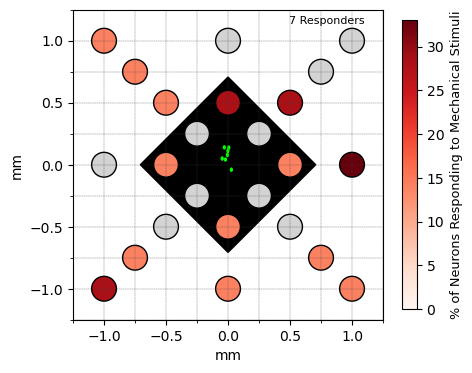

# of Responses at each location: 
[0.0, 0.0, 3.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [11]:
allData = []
allROIs = []

# loop through all neurons in the datasheet
for item in cellDataList:
    
    # sort for responding cells only
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        
        # get locations of stimuli that caused a response in this cell
        data = item['25s Mech Stim Window Binary'][1:-1]
        # get ROI coordinate of this cell
        data2 = item['ROI Coords'][1:-1]

        #To assist in cleaning the data into times and intensities
        split_char1 = ","

        dataList = []
        cellBody = []
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        for i in range(len(nextValue)):
            dataList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        
        allData.append(dataList)
        allROIs.append(cellBody)
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 45, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds'](3*popData[i]/len(allData)))
        ax.add_artist(c)
        
for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=33), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='% of Neurons Responding to Mechanical Stimuli', size=9.25)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.8, 1.2, str(len(allData)) + ' Responders', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

plt.savefig('CCK Mucosal Grid.png', bbox_inches='tight')
plt.show()

print("# of Responses at each location: ")
print(popData)

## MYP ONLY Population Mechanical Response Grid (Binary during 25s Stimulus Window)

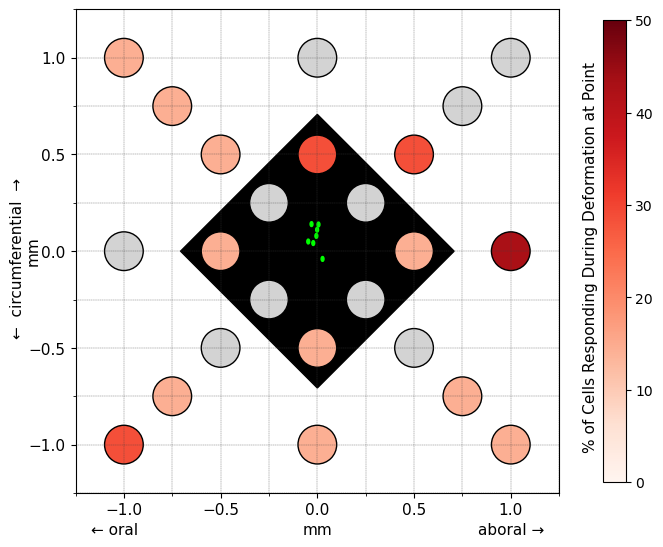

# of Responses at each location: 
[0.0, 0.0, 3.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
# of MYP responders:  7


In [12]:
allData = []
allROIs = []

for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "MYP":
            data = item['25s Mech Stim Window Binary'][1:-1]
            data2 = item['ROI Coords'][1:-1]

            split_char1 = ","

            dataList = []
            cellBody = []
            nextValue = data.split(split_char1)
            nextValue2 = data2.split(split_char1)
            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                dataList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellBody.append(float(nextValue2[i]))

            allData.append(dataList)
            allROIs.append(cellBody)
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(8,8))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 45, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds'](2*popData[i]/len(allData)))
        ax.add_artist(c)
        
for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=50), cmap= 'Reds'), ax = ax, \
             shrink = 0.75, pad=0.07)   

#ax.set_xlabel('mm', fontsize = 11)    
#ax.set_ylabel('mm', fontsize = 11)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 11)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

ax.text(-1.05, -1.4, "\u2190 oral", ha='center', va='top', color='black', size = 11)
ax.text(1, -1.4, "aboral \u2192", ha='center', va='top', color='black', size = 11)
ax.text(0, -1.4, "mm", ha='center', va='top', color='black', size = 11)
ax.text(-1.55, 0.38, "\u2190  circumferential  \u2192", ha='center', va='top', color='black', size = 11, rotation = 'vertical')
ax.text(-1.47, 0.08, "mm", ha='center', va='top', color='black', size = 11, rotation = 'vertical')
ax.text(1.41, 0.98, '% of Cells Responding During Deformation at Point', ha='center', va='top', color='black', size = 11, rotation = 'vertical')

#ax.text(0, 1.2, str(len(allData)) + ' MYP Quiescent Responders', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

#plt.savefig("MYP 24-Point.pdf", bbox_inches='tight')
plt.show()

print("# of Responses at each location: ")
print(popData)

print("# of MYP responders: ", len(allData))

## SMP ONLY Population Mechanical Response Grid (Binary during 25s Stimulus Window)

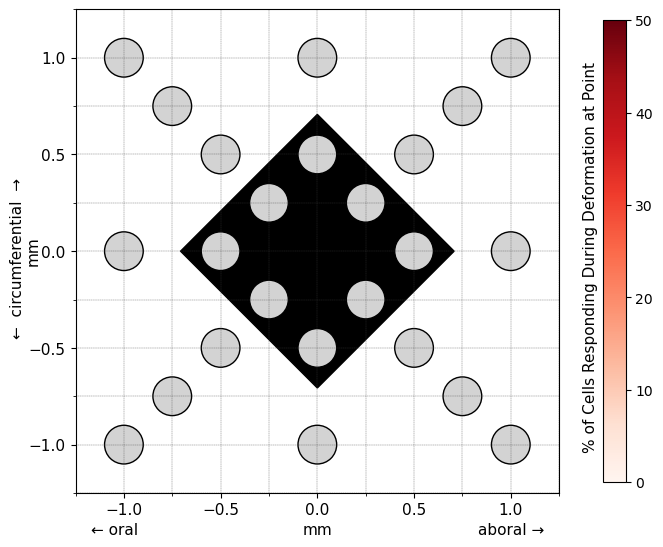

# of Responses at each location: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# of SMP responders:  0


In [13]:
allData = []
allROIs = []

for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "SMP":
            data = item['25s Mech Stim Window Binary'][1:-1]
            data2 = item['ROI Coords'][1:-1]

            split_char1 = ","

            dataList = []
            cellBody = []
            nextValue = data.split(split_char1)
            nextValue2 = data2.split(split_char1)
            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                dataList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellBody.append(float(nextValue2[i]))

            allData.append(dataList)
            allROIs.append(cellBody)
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(8,8))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 45, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds'](2*popData[i]/len(allData)))
        ax.add_artist(c)

for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

#fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=50), cmap= 'Reds'), ax = ax, \
             #shrink = 0.75).set_label(label='% of Cells Responding During Deformation at Point', size=11)
fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=50), cmap= 'Reds'), ax = ax, \
             shrink = 0.75, pad=0.07)   
    
#ax.set_xlabel('mm', fontsize = 11)    
#ax.set_ylabel('mm', fontsize = 11)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 11)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

ax.text(-1.05, -1.4, "\u2190 oral", ha='center', va='top', color='black', size = 11)
ax.text(1, -1.4, "aboral \u2192", ha='center', va='top', color='black', size = 11)
ax.text(0, -1.4, "mm", ha='center', va='top', color='black', size = 11)
ax.text(-1.55, 0.38, "\u2190  circumferential  \u2192", ha='center', va='top', color='black', size = 11, rotation = 'vertical')
ax.text(-1.47, 0.08, "mm", ha='center', va='top', color='black', size = 11, rotation = 'vertical')
ax.text(1.41, 0.98, '% of Cells Responding During Deformation at Point', ha='center', va='top', color='black', size = 11, rotation = 'vertical')


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

#plt.savefig("SMP 24-Point.pdf", bbox_inches='tight')
plt.show()

print("# of Responses at each location: ")
print(popData)

print("# of SMP responders: ", len(allData))

## Only Responder Binary Plots -- red = response to stimuli at this location - ALL CELLS

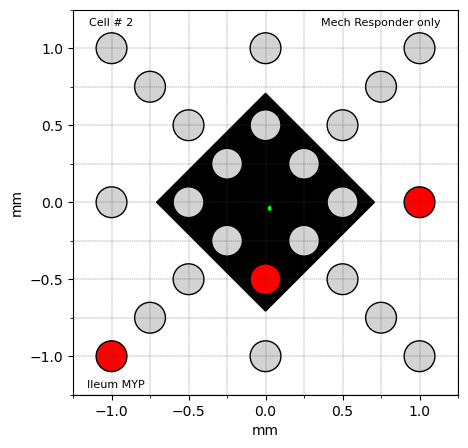

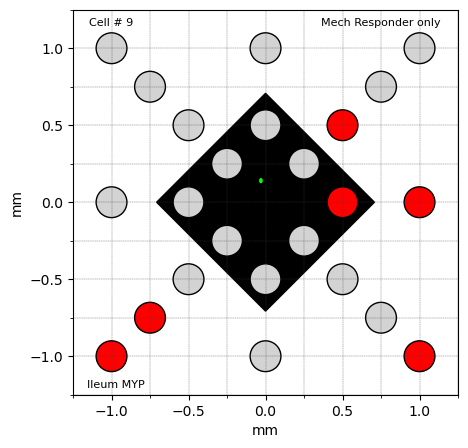

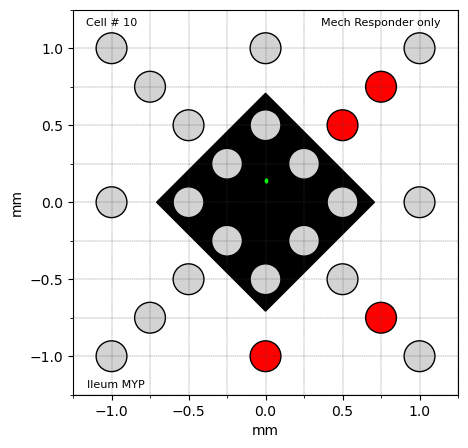

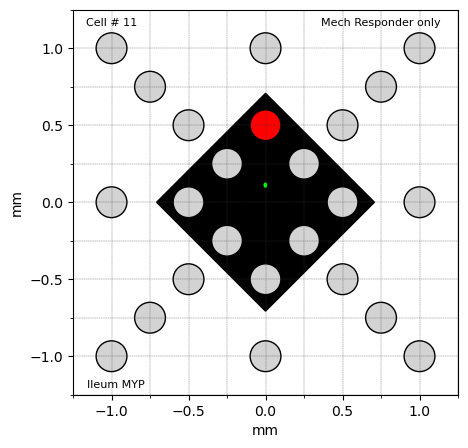

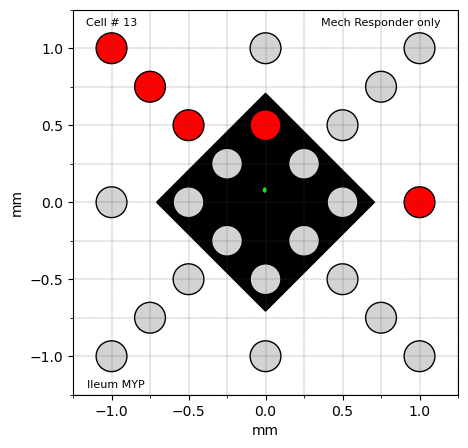

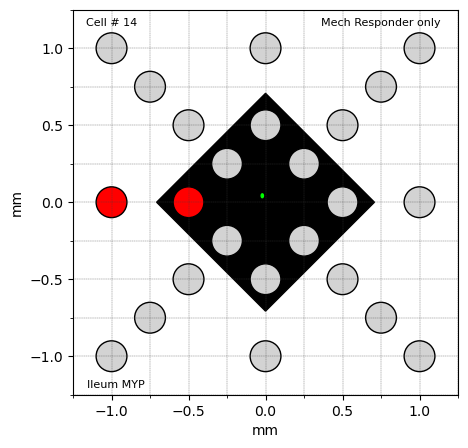

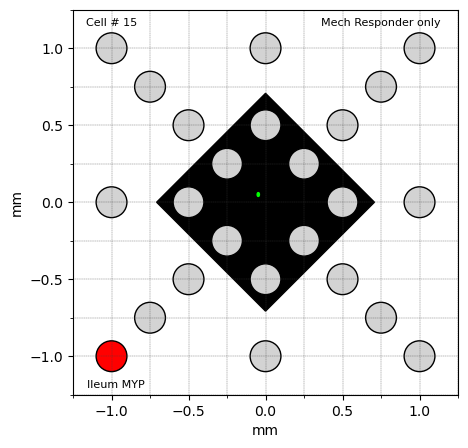

Radial distance from soma of each responding spot:
[0.97, 1.41, 0.46, 1.04, 1.54, 1.5, 1.14, 0.64, 0.55, 1.14, 0.96, 1.16, 0.61, 0.39, 1.01, 1.36, 1.0, 0.42, 0.65, 0.98, 0.48, 1.42]
22


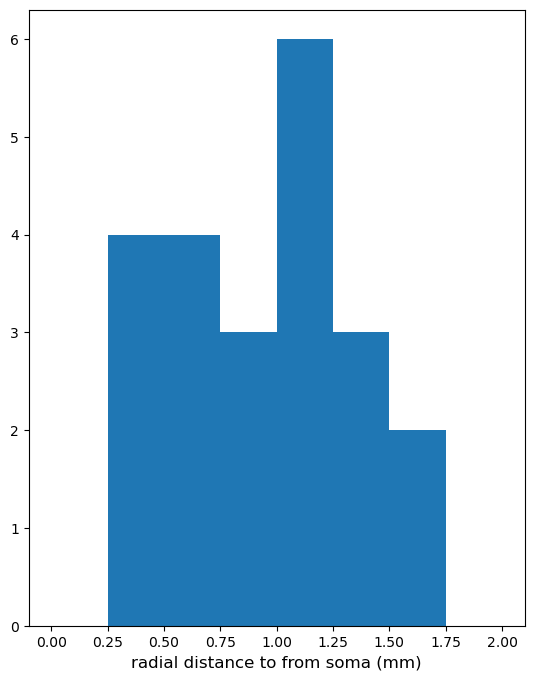

[0. 4. 4. 3. 6. 3. 2. 0.]
Responding Spot location with respect to cell body location
[[0.97, 0.04], [-1.03, -0.96], [-0.03, -0.46], [1.03, -0.14], [1.03, -1.14], [-0.97, -1.14], [-0.72, -0.89], [0.53, 0.36], [0.53, -0.14], [-0.01, -1.14], [0.74, 0.61], [0.74, -0.89], [0.49, 0.36], [0.0, 0.39], [1.0, -0.08], [-0.99, 0.92], [-0.74, 0.67], [0.01, 0.42], [-0.49, 0.42], [-0.98, -0.04], [-0.48, -0.04], [-0.95, -1.05]]


C:\Users\m314579\AppData\Local\Temp\ipykernel_28840\3648591712.py:137: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  k = kde.gaussian_kde(np.array(coordinateList).T)


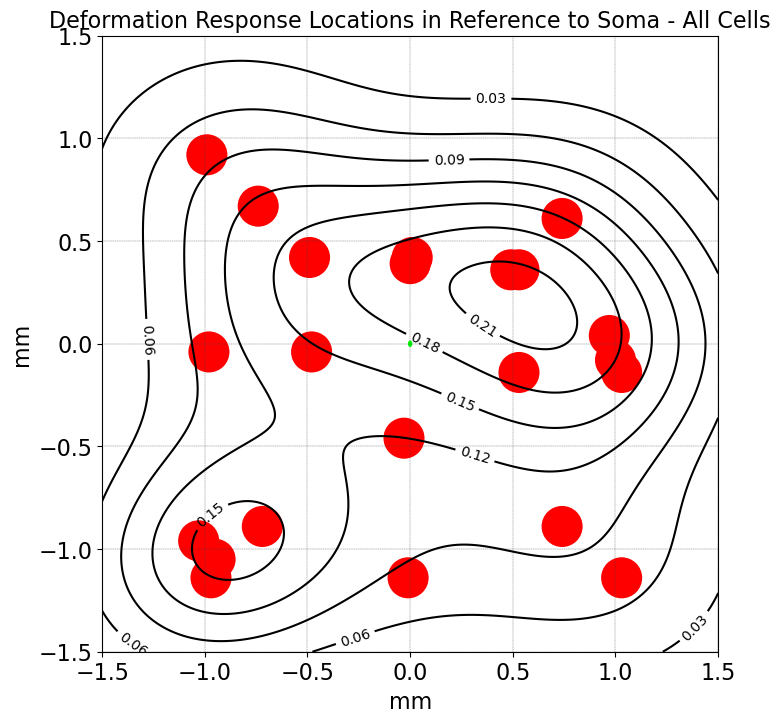

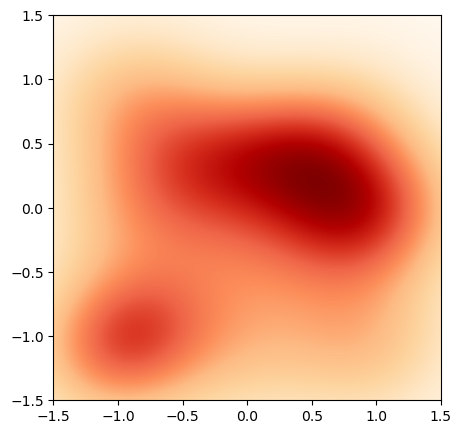

'\nfig, ax = plt.subplots(figsize=(5,5))\n\nnbins = 50\n\n# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents\nk = kde.gaussian_kde(np.array(coordinateList).T)\nxi, yi = np.mgrid[-1.5:1.5:nbins*1j, -1.5:1.5:nbins*1j]\nzi = k(np.vstack([xi.flatten(), yi.flatten()]))\nplt.contour(xi, yi, zi.reshape(xi.shape))\n\nplt.show()\n'

In [14]:
radialList = []
coordinateList = []

cellNum = 0

for item in cellDataList:
    
    cellNum = cellNum + 1
    
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]
        data3 = item['20s Post Stim Window Binary'][1:-1]

        split_char1 = ","

        dataList = []
        cellBody = []
        dataList2 = []
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        nextValue3 = data3.split(split_char1)
        
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            dataList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            dataList2.append(float(nextValue3[i]))

        xgrid = np.arange(-1, 1, 0.25)
        ygrid = np.arange(-1, 1, 0.25)


        fig, ax = plt.subplots(figsize=(5,5))

        ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

        r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 45, rotation_point='center')
        ax.add_artist(r)

        for i in range(len(stimLocations)):
            if dataList[i] == 0 and dataList2[i] == 0:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                ax.add_artist(c)
            else:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='red')
                ax.add_artist(c)
                xCoord =  stimLocations[i][0] - cellBody[0]
                yCoord =  stimLocations[i][1] - cellBody[1] 
                length = round(math.sqrt((xCoord**2) + (yCoord**2)), 2)
                #print(str(xCoord) + ", "+ str(yCoord) + ", " + str(length))
                radialList.append(length)
                coordinateList.append([round(xCoord,2), round(yCoord,2)])
 
        # Display Cell
        cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
        ax.add_artist(cell)

        ax.set_xlabel('mm', fontsize = 10)    
        ax.set_ylabel('mm', fontsize = 10)
        #ax.set_title('Mechanical Response Grid')

        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))

        ax.tick_params(labelsize = 10)

        ax.set_xlim([-1.25, 1.25])
        ax.set_ylim([-1.25, 1.25])

        ax.set_aspect(1.0)

        ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 8)
        ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 8)

        
        ax.text(0.75, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 8)

        #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

        plt.show()

print("Radial distance from soma of each responding spot:")
print(radialList)
print(len(radialList))

#Creates intensity vs time plot, setting size of plot
allRadial = plt.figure()
allRadial.set_figheight(8)
counts = plt.hist(radialList, bins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])

plt.xlabel('radial distance to from soma (mm)', fontdict = {'fontsize' : 12})

plt.show()
print(counts[0])

print("Responding Spot location with respect to cell body location")
print(coordinateList)

#Responding Spot Plot
xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)

fig, ax = plt.subplots(figsize=(8,8))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

ax.set_title('Deformation Response Locations in Reference to Soma - All Cells', fontsize = 16)

for i in range(len(coordinateList)):
    c = Circle(coordinateList[i], radius = 0.1, facecolor= "red")
    ax.add_artist(c)

ax.set_xlabel('mm', fontsize = 16)    
ax.set_ylabel('mm', fontsize = 16)

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

ax.set_aspect(1.0)

ax.tick_params(labelsize = 16)

cells = Ellipse((0,0), 0.015, 0.025, edgecolor='lime', facecolor='lime')
ax.add_artist(cells)

nbins = 500

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(np.array(coordinateList).T)
xi, yi = np.mgrid[-1.5:1.5:nbins*1j, -1.5:1.5:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black').clabel(inline=1, fontsize=10)

plt.show()

fig, ax = plt.subplots(figsize=(5,5))


plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap = "OrRd" )
#plt.imshow(zi.reshape(xi.shape), extent=[xi.min(), xi.max(), yi.min(), yi.max()],
           #cmap='Oranges')
plt.show()

#z2 = zi.reshape(xi.shape)
#XYZ = list(zip(xi, yi, z2))
#xyz_array = np.array(XYZ)
#sns.heatmap(xyz_array)
#plot.show()

'''
fig, ax = plt.subplots(figsize=(5,5))

nbins = 50

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(np.array(coordinateList).T)
xi, yi = np.mgrid[-1.5:1.5:nbins*1j, -1.5:1.5:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.contour(xi, yi, zi.reshape(xi.shape))

plt.show()
'''

## Only Responder Binary Plots -- red = response to stimuli at this location - MYP ONLY

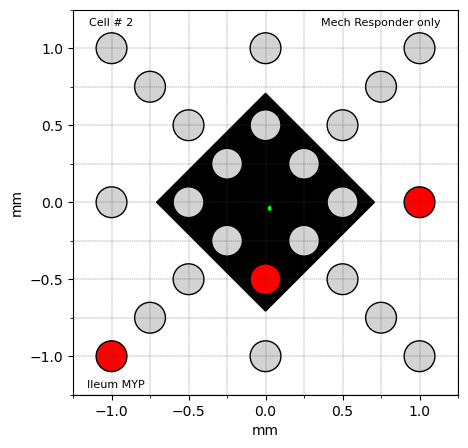

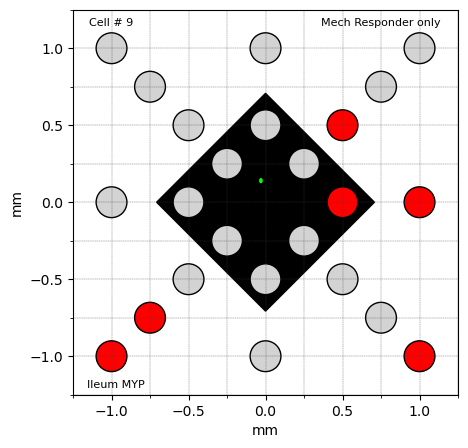

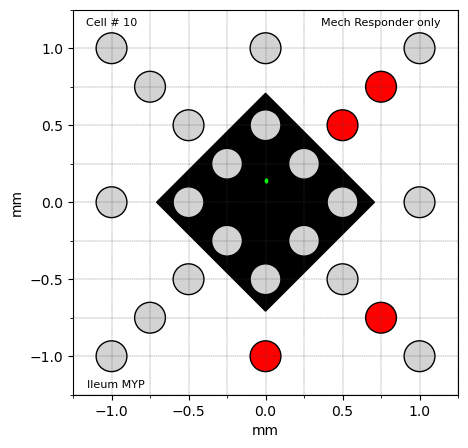

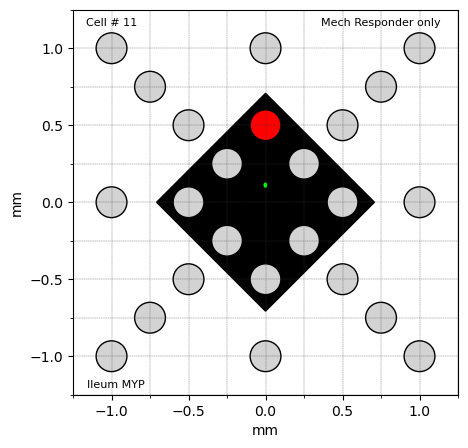

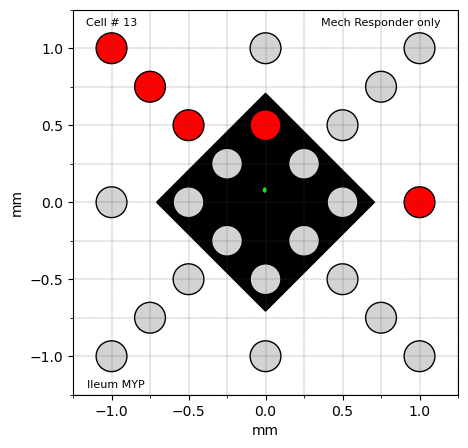

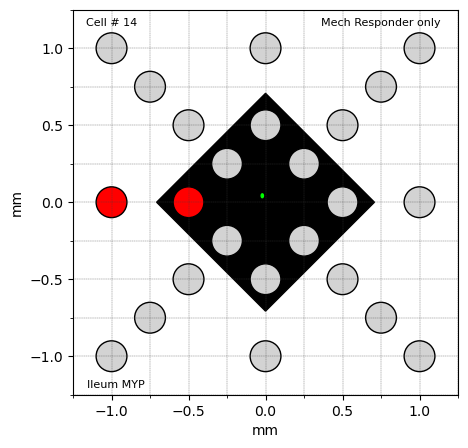

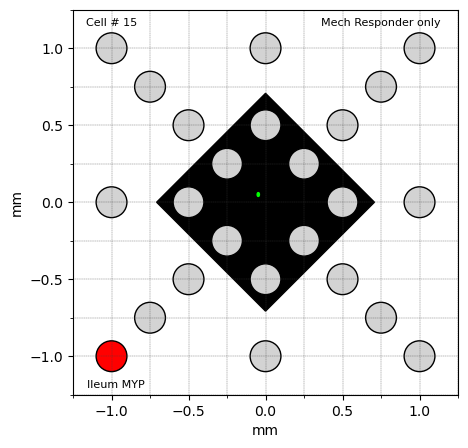

Radial distance from soma of each responding spot:
[0.97, 1.41, 0.46, 1.04, 1.54, 1.5, 1.14, 0.64, 0.55, 1.14, 0.96, 1.16, 0.61, 0.39, 1.01, 1.36, 1.0, 0.42, 0.65, 0.98, 0.48, 1.42]
22


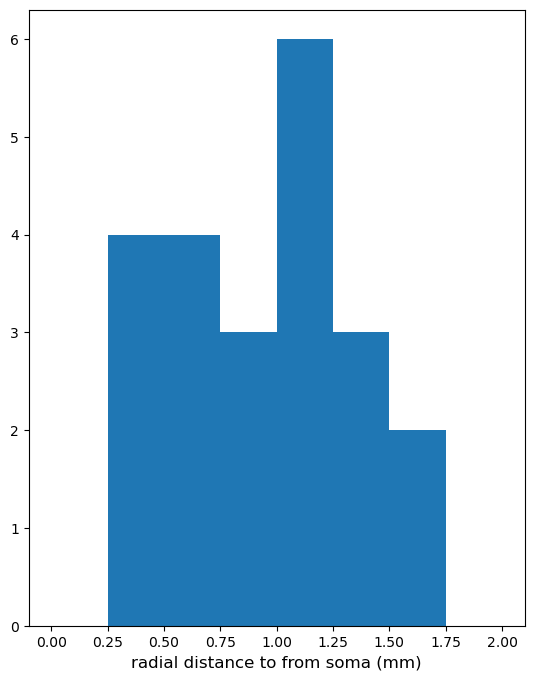

[0. 4. 4. 3. 6. 3. 2. 0.]
Responding Spot location with respect to cell body location - MYP
[[0.97, 0.04], [-1.03, -0.96], [-0.03, -0.46], [1.03, -0.14], [1.03, -1.14], [-0.97, -1.14], [-0.72, -0.89], [0.53, 0.36], [0.53, -0.14], [-0.01, -1.14], [0.74, 0.61], [0.74, -0.89], [0.49, 0.36], [0.0, 0.39], [1.0, -0.08], [-0.99, 0.92], [-0.74, 0.67], [0.01, 0.42], [-0.49, 0.42], [-0.98, -0.04], [-0.48, -0.04], [-0.95, -1.05]]


C:\Users\m314579\AppData\Local\Temp\ipykernel_28840\1138881683.py:138: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  k = kde.gaussian_kde(np.array(coordinateList).T)


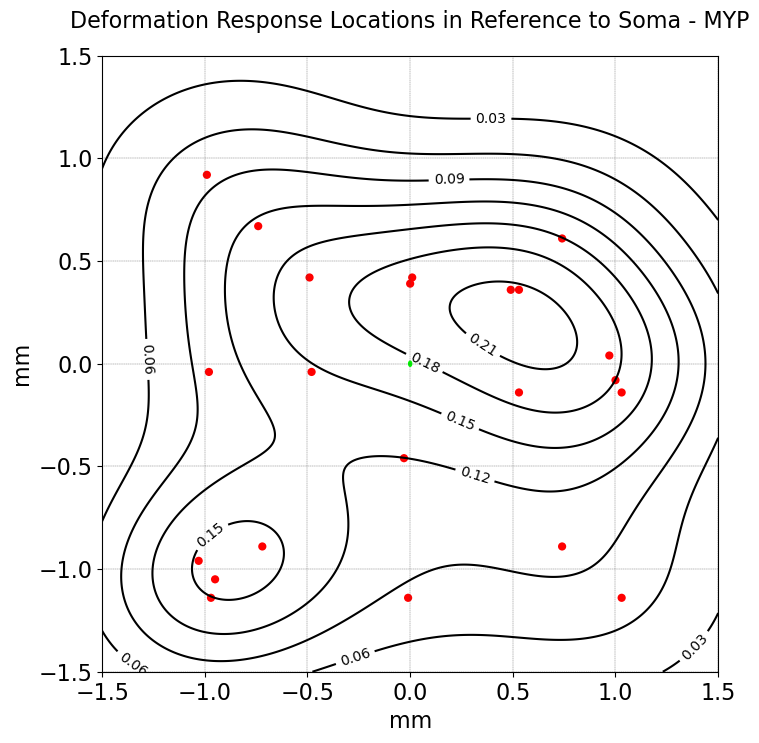

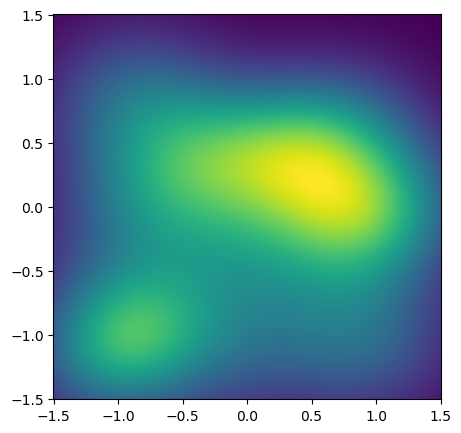

In [15]:
radialList = []
coordinateList = []

cellNum = 0

for item in cellDataList:
    
    cellNum = cellNum + 1
    
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "MYP":
            data = item['25s Mech Stim Window Binary'][1:-1]
            data2 = item['ROI Coords'][1:-1]
            data3 = item['20s Post Stim Window Binary'][1:-1]

            split_char1 = ","

            dataList = []
            cellBody = []
            dataList2 = []
            nextValue = data.split(split_char1)
            nextValue2 = data2.split(split_char1)
            nextValue3 = data3.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                dataList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellBody.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                dataList2.append(float(nextValue3[i]))

            xgrid = np.arange(-1, 1, 0.25)
            ygrid = np.arange(-1, 1, 0.25)


            fig, ax = plt.subplots(figsize=(5,5))

            ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

            r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 45, rotation_point='center')
            ax.add_artist(r)

            for i in range(len(stimLocations)):
                if dataList[i] == 0 and dataList2[i] == 0:
                    c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                    ax.add_artist(c)
                else:
                    c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='red')
                    ax.add_artist(c)
                    xCoord =  stimLocations[i][0] - cellBody[0]
                    yCoord =  stimLocations[i][1] - cellBody[1] 
                    length = round(math.sqrt((xCoord**2) + (yCoord**2)), 2)
                    #print(str(xCoord) + ", "+ str(yCoord) + ", " + str(length))
                    radialList.append(length)
                    coordinateList.append([round(xCoord,2), round(yCoord,2)])

            # Display Cell
            cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
            ax.add_artist(cell)

            ax.set_xlabel('mm', fontsize = 10)    
            ax.set_ylabel('mm', fontsize = 10)
            #ax.set_title('Mechanical Response Grid')

            ax.yaxis.set_minor_locator(MultipleLocator(0.25))
            ax.xaxis.set_minor_locator(MultipleLocator(0.25))
            ax.yaxis.set_major_locator(MultipleLocator(0.5))
            ax.xaxis.set_major_locator(MultipleLocator(0.5))

            ax.tick_params(labelsize = 10)

            ax.set_xlim([-1.25, 1.25])
            ax.set_ylim([-1.25, 1.25])

            ax.set_aspect(1.0)

            ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 8)
            ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 8)


            ax.text(0.75, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 8)

            #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

            plt.show()

print("Radial distance from soma of each responding spot:")
print(radialList)
print(len(radialList))

#Creates intensity vs time plot, setting size of plot
allRadial = plt.figure()
allRadial.set_figheight(8)
counts = plt.hist(radialList, bins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])

plt.xlabel('radial distance to from soma (mm)', fontdict = {'fontsize' : 12})

plt.show()
print(counts[0])

print("Responding Spot location with respect to cell body location - MYP")
print(coordinateList)

#Responding Spot Plot
xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)

fig, ax = plt.subplots(figsize=(8,8))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

ax.set_title('Deformation Response Locations in Reference to Soma - MYP', pad = 20, fontsize = 16)

for i in range(len(coordinateList)):
    c = Circle(coordinateList[i], radius = 0.02, facecolor= "red")
    ax.add_artist(c)

ax.set_xlabel('mm', fontsize = 16)    
ax.set_ylabel('mm', fontsize = 16)

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

ax.set_aspect(1.0)

ax.tick_params(labelsize = 16)

cells = Ellipse((0,0), 0.015, 0.025, edgecolor='lime', facecolor='lime')
ax.add_artist(cells)

nbins = 500

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(np.array(coordinateList).T)
xi, yi = np.mgrid[-1.5:1.5:nbins*1j, -1.5:1.5:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black').clabel(inline=1, fontsize=10)

plt.show()

fig, ax = plt.subplots(figsize=(5,5))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape))

plt.show()

## Only Responder Binary Plots -- red = response to stimuli at this location - SMP ONLY

Radial distance from soma of each responding spot:
[]
0


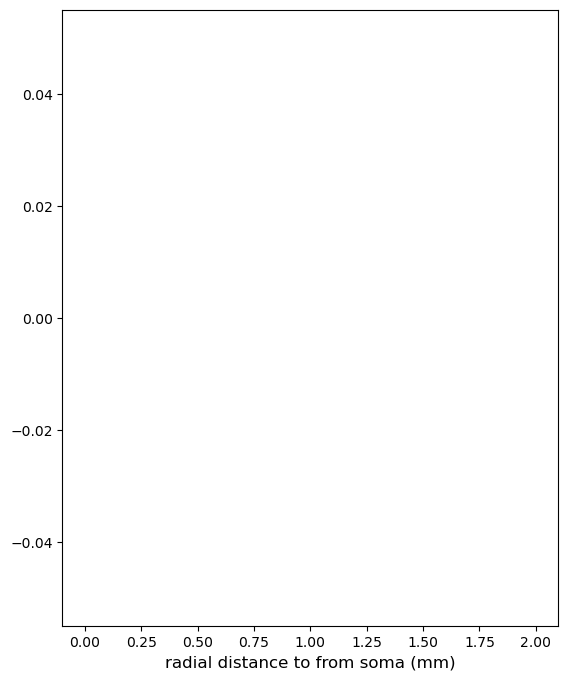

[0. 0. 0. 0. 0. 0. 0. 0.]
Responding Spot location with respect to cell body location
[]


C:\Users\m314579\AppData\Local\Temp\ipykernel_28840\1298658865.py:138: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  k = kde.gaussian_kde(np.array(coordinateList).T)


ValueError: `dataset` input should have multiple elements.

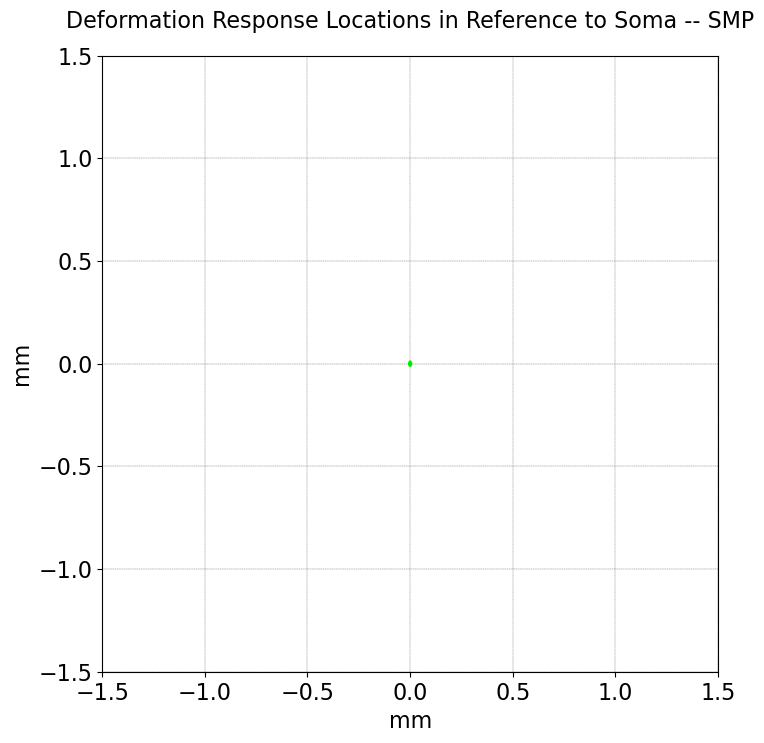

In [16]:
radialList = []
coordinateList = []

cellNum = 0

for item in cellDataList:
    
    cellNum = cellNum + 1
    
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "SMP":       
            data = item['25s Mech Stim Window Binary'][1:-1]
            data2 = item['ROI Coords'][1:-1]
            data3 = item['20s Post Stim Window Binary'][1:-1]

            split_char1 = ","

            dataList = []
            cellBody = []
            dataList2 = []
            nextValue = data.split(split_char1)
            nextValue2 = data2.split(split_char1)
            nextValue3 = data3.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                dataList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellBody.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                dataList2.append(float(nextValue3[i]))

            xgrid = np.arange(-1, 1, 0.25)
            ygrid = np.arange(-1, 1, 0.25)


            fig, ax = plt.subplots(figsize=(5,5))

            ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

            r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 45, rotation_point='center')
            ax.add_artist(r)

            for i in range(len(stimLocations)):
                if dataList[i] == 0 and dataList2[i] == 0:
                    c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                    ax.add_artist(c)
                else:
                    c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='red')
                    ax.add_artist(c)
                    xCoord =  stimLocations[i][0] - cellBody[0]
                    yCoord =  stimLocations[i][1] - cellBody[1] 
                    length = round(math.sqrt((xCoord**2) + (yCoord**2)), 2)
                    #print(str(xCoord) + ", "+ str(yCoord) + ", " + str(length))
                    radialList.append(length)
                    coordinateList.append([round(xCoord,2), round(yCoord,2)])

            # Display Cell
            cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
            ax.add_artist(cell)

            ax.set_xlabel('mm', fontsize = 10)    
            ax.set_ylabel('mm', fontsize = 10)
            #ax.set_title('Mechanical Response Grid')

            ax.yaxis.set_minor_locator(MultipleLocator(0.25))
            ax.xaxis.set_minor_locator(MultipleLocator(0.25))
            ax.yaxis.set_major_locator(MultipleLocator(0.5))
            ax.xaxis.set_major_locator(MultipleLocator(0.5))

            ax.tick_params(labelsize = 10)

            ax.set_xlim([-1.25, 1.25])
            ax.set_ylim([-1.25, 1.25])

            ax.set_aspect(1.0)

            ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 8)
            ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 8)


            ax.text(0.75, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 8)

            #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

            plt.show()

print("Radial distance from soma of each responding spot:")
print(radialList)
print(len(radialList))

#Creates intensity vs time plot, setting size of plot
allRadial = plt.figure()
allRadial.set_figheight(8)
counts = plt.hist(radialList, bins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])

plt.xlabel('radial distance to from soma (mm)', fontdict = {'fontsize' : 12})

plt.show()
print(counts[0])

print("Responding Spot location with respect to cell body location")
print(coordinateList)

#Responding Spot Plot
xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)

fig, ax = plt.subplots(figsize=(8,8))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

ax.set_title('Deformation Response Locations in Reference to Soma -- SMP', pad = 20, fontsize = 16)

for i in range(len(coordinateList)):
    c = Circle(coordinateList[i], radius = 0.02, facecolor= "red")
    ax.add_artist(c)

ax.set_xlabel('mm', fontsize = 16)    
ax.set_ylabel('mm', fontsize = 16)

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

ax.set_aspect(1.0)

ax.tick_params(labelsize = 16)

cells = Ellipse((0,0), 0.015, 0.025, edgecolor='lime', facecolor='lime')
ax.add_artist(cells)

nbins = 500

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(np.array(coordinateList).T)
xi, yi = np.mgrid[-1.5:1.5:nbins*1j, -1.5:1.5:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.contour(xi, yi, zi.reshape(xi.shape), colors='black').clabel(inline=1, fontsize=10)

plt.show()

fig, ax = plt.subplots(figsize=(5,5))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape))

plt.show()

# Using Radial Distance Histogram (from just above) to make a plot. Have to manually enter data!

In [ ]:
xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)

fig, ax = plt.subplots(figsize=(8,8))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-2,-2), 4, 4, edgecolor='black', facecolor=plt.colormaps['Reds'](0))
ax.add_artist(r)

# USES HISTOGRAM DATA FROM ABOVE... manually combined first 2 bins since didn't allow me to combine them
radialHist = [109, 76, 71, 56, 35, 12, 0]
xList = [2, 1.75, 1.5, 1.25, 1, 0.75, 0.5]    
for i in range(7):
    c = Circle([0,0], xList[i],  facecolor= plt.colormaps['Reds'](int(radialHist[-i-1])/100))
    ax.add_artist(c)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=109), cmap= 'Reds'), ax = ax, \
             shrink = 0.75, pad =0.07)

ax.text(2.25, 1.75, '# of Responses to Deformation at a Radial Distance', ha='center', va='top', color='black', size = 12, rotation = 'vertical')

ax.set_xlabel('mm', fontsize = 16)    
ax.set_ylabel('mm', fontsize = 16)

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

ax.set_aspect(1.0)

ax.tick_params(labelsize = 16)

cells = Ellipse((0,0), 0.015, 0.025, edgecolor='lime', facecolor='lime')
ax.add_artist(cells)

plt.show()

# Spontaneous Cell Plots

## Population Mechanical Response Grid (Binary during 25s Stimulus Window)

In [ ]:
allData = []


for item in cellDataList:
    if item['Responder?'] == "Spontaneous Cell":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]

        split_char1 = ","

        dataList = []
        cellBody = []
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            dataList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        
        allData.append(dataList)
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)


for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds'](popData[i]/len(allData)))
        ax.add_artist(c)

# Display Cell
#cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
#ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=100), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='% of Neurons Responding to Mechanical Stimuli', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.65, 1.2, str(len(allData)) + ' Spontaneous Cells', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: " + str(popData))

## Only Spontaneous Binary Plots (Binary during 25s Stimulus Window)

In [ ]:
cellNum = 0

for item in cellDataList:
    cellNum = cellNum + 1
    
    if item['Responder?'] == "Spontaneous Cell":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]

        split_char1 = ","

        dataList = []
        cellBody = []
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            dataList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))

        xgrid = np.arange(-1, 1, 0.25)
        ygrid = np.arange(-1, 1, 0.25)


        fig, ax = plt.subplots(figsize=(5,5))

        ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

        r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
        ax.add_artist(r)

        for i in range(len(stimLocations)):
            if dataList[i] == 0:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                ax.add_artist(c)
            else:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='red')
                ax.add_artist(c)

        # Display Cell
        cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
        ax.add_artist(cell)

        ax.set_xlabel('mm', fontsize = 10)    
        ax.set_ylabel('mm', fontsize = 10)
        #ax.set_title('Mechanical Response Grid')

        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))

        ax.tick_params(labelsize = 10)

        ax.set_xlim([-1.25, 1.25])
        ax.set_ylim([-1.25, 1.25])

        ax.set_aspect(1.0)

        ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 8)
        ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 8)

        ax.text(0.75, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 8)

        #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

        plt.show()

## Population Mechanical Response Grid (Binary during Post-Stimulation Window)

In [ ]:
allData = []


for item in cellDataList:
    if item['Responder?'] == "Spontaneous Cell":
        data = item['20s Post Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]

        split_char1 = ","

        dataList = []
        cellBody = []
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            dataList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        
        allData.append(dataList)
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds'](popData[i]/len(allData)))
        ax.add_artist(c)

# Display Cell
#cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
#ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=100), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='% of Neurons Responding to Mechanical Stimuli', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.65, 1.2, str(len(allData)) + ' Spontaneous Cells', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: " + str(popData))

## Only Spontaneous Binary Plots (Binary during Post-Stimulation Window)

In [ ]:
cellNum = 0

for item in cellDataList:
    cellNum = cellNum + 1
        
    if item['Responder?'] == "Spontaneous Cell":
        data = item['20s Post Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]

        split_char1 = ","

        dataList = []
        cellBody = []
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            dataList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))

        xgrid = np.arange(-1, 1, 0.25)
        ygrid = np.arange(-1, 1, 0.25)


        fig, ax = plt.subplots(figsize=(5,5))

        ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

        r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
        ax.add_artist(r)

        for i in range(len(stimLocations)):
            if dataList[i] == 0:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                ax.add_artist(c)
            else:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='red')
                ax.add_artist(c)

        # Display Cell
        cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
        ax.add_artist(cell)

        ax.set_xlabel('mm', fontsize = 10)    
        ax.set_ylabel('mm', fontsize = 10)
        #ax.set_title('Mechanical Response Grid')

        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))

        ax.tick_params(labelsize = 10)

        ax.set_xlim([-1.25, 1.25])
        ax.set_ylim([-1.25, 1.25])

        ax.set_aspect(1.0)

        ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 8)
        ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 8)

        ax.text(0.9, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 8)

        #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

        plt.show()

# EFS Responses Only

In [ ]:
cellNum = 0

for item in cellDataList:
    cellNum = cellNum + 1
        
    if "1" in item['EFS Binary']:
        data = item['EFS Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]

        split_char1 = ","

        dataList = []
        cellBody = []
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            dataList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))

        xgrid = np.arange(-1, 1, 0.25)
        ygrid = np.arange(-1, 1, 0.25)
        
        #print(item['Step 1 Latency to Spike in Stim Window'])

        fig, ax = plt.subplots(figsize=(5,5))

        ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

        r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
        ax.add_artist(r)

        for i in range(len(stimLocations)):
            if dataList[i] == 0:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                ax.add_artist(c)
            else:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='yellow')
                ax.add_artist(c)

        # Display Cell
        cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
        ax.add_artist(cell)

        ax.set_xlabel('mm', fontsize = 10)    
        ax.set_ylabel('mm', fontsize = 10)
        #ax.set_title('Mechanical Response Grid')

        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))

        ax.tick_params(labelsize = 10)

        ax.set_xlim([-1.25, 1.25])
        ax.set_ylim([-1.25, 1.25])

        ax.set_aspect(1.0)

        ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 8)
        ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 8)

        if item['Responder?'] == "Spontaneous Cell":
            ax.text(0.9, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 8)
        elif item['Responder?'] == "Yes":
            ax.text(0.9, 1.2, 'Responder', ha='center', va='top', color='black', size = 8)
        else:
            ax.text(0.9, 1.2, 'Non-Responder', ha='center', va='top', color='black', size = 8)

        #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

        plt.show()

# Plotting all of the Latencies for each responding spot

Here are all of the latencies:
[8.48, 4.88, 0.3, 3.49, 4.03, 28.31, 2.84, 7.86, 22.47, 5.63, 27.42, 24.94, 12.43, 0.34, 22.31, 0.3, 0.38, 0.28, 0.36, 37.69, 4.57, 5.06]
MYP latencies:
[8.48, 4.88, 0.3, 3.49, 4.03, 28.31, 2.84, 7.86, 22.47, 5.63, 27.42, 24.94, 12.43, 0.34, 22.31, 0.3, 0.38, 0.28, 0.36, 37.69, 4.57, 5.06]
SMP latencies:
[]
Here are all of the # of spikes/spot:
[3, 1, 1, 3, 5, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4]
MYP # of spikes/spot:
[3, 1, 1, 3, 5, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4]
SMP # of spikes/spot:
[]
Mech count of spikes per spot:  [2, 1, 1, 3, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]


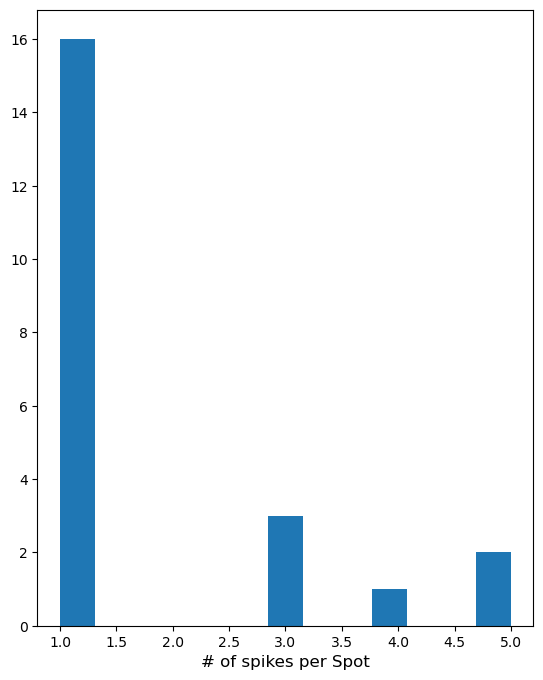

[16.  0.  0.  0.  0.  0.  3.  0.  0.  1.  0.  0.  2.]
22
Number of Spots: 22

The average Latency is: 10.198636363636364


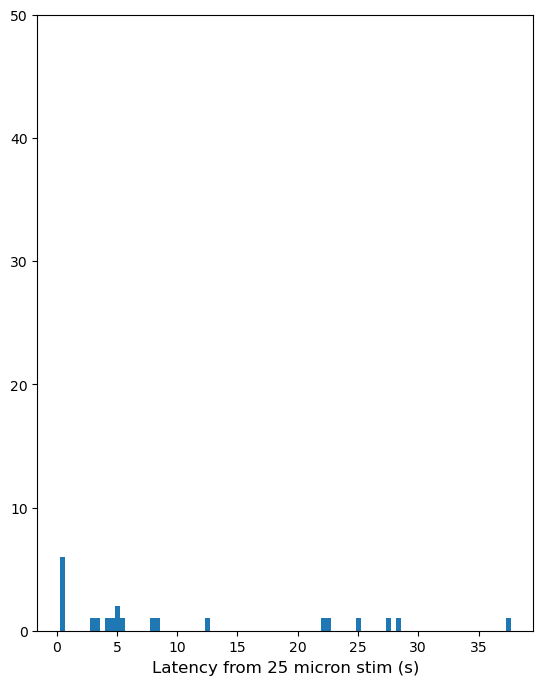

[6. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 2. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [17]:
from statistics import mean 

allLatencies = []
MYPLatencies = []
SMPLatencies = []
allAvgFreq = []
MYPAvgFreq = []
SMPAvgFreq = []
spikesPerEpoch = []
Totalspikes = 0
spikeCounter = 0


for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder": 
        cellBin = item['25s Mech Stim Window Binary'][1:-1]
        cellLat = item['Step 1 Latency to Spike in Stim Window'][1:-1]
        cellBin2 = item['20s Post Stim Window Binary'][1:-1]
        cellLat2 = item['Step 1 Latency to Spike in Post Stim Window'][1:-1]
        cellAvg = item['Avg Freq Full 45s'][1:-1]
        approvedSpikes = item['All Approved Cell Spike Times'][1:-1]
        
        split_char1 = ","

        cellBinList = []
        cellLatList = []
        cellBin2List = []
        cellLat2List = []
        cellAvgList = []
        spikeList = []
        nextValue = cellBin.split(split_char1)
        nextValue2 = cellLat.split(split_char1)
        nextValue3 = cellBin2.split(split_char1)
        nextValue4 = cellLat2.split(split_char1)
        nextValue5 = cellAvg.split(split_char1)
        nextValue6 = approvedSpikes.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            cellBinList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellLatList.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            cellBin2List.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            cellLat2List.append(float(nextValue4[i]))
        for i in range(len(nextValue5)):
            cellAvgList.append(float(nextValue5[i]))
        for i in range(len(nextValue6)):
            spikeList.append(float(nextValue6[i]))
        
        for y in range(24):
            if cellBinList[y] == 1:
                allLatencies.append(cellLatList[y])
                allAvgFreq.append(cellAvgList[y])
                if item['Plexus'] == "MYP":
                    MYPLatencies.append(cellLatList[y])
                    MYPAvgFreq.append(cellAvgList[y])
                elif item['Plexus'] == "SMP":
                    SMPLatencies.append(cellLatList[y])
                    SMPAvgFreq.append(cellAvgList[y])
                    
            elif cellBin2List[y] == 1:
                allLatencies.append(cellLat2List[y])
                allAvgFreq.append(cellAvgList[y])
                if item['Plexus'] == "MYP":
                    MYPLatencies.append(cellLat2List[y])
                    MYPAvgFreq.append(cellAvgList[y])
                elif item['Plexus'] == "SMP":
                    SMPLatencies.append(cellLat2List[y])
                    SMPAvgFreq.append(cellAvgList[y])
        for i in range(24):
            spikeCounter = 0
            if i == 11:
                epochEndTime = 568
            else:
                epochEndTime = vLineList[4+(i*4)]
            if i == 0:
                epochStartTime = 0
            if i == 12:
                epochStartTime = 568.65
            else:
                epochStartTime = vLineList[(i*4)-1] 
            for item in spikeList:
                if item >= epochStartTime and item < epochEndTime:
                    spikeCounter += 1
            if spikeCounter > 0:
                spikesPerEpoch.append(spikeCounter)
        

print("Here are all of the latencies:")
print(allLatencies)
print("MYP latencies:")
print(MYPLatencies)
print("SMP latencies:")
print(SMPLatencies)


print("Here are all of the # of spikes/spot:")
spikesPerSpot = []
for f in allAvgFreq:
    if f != 0.0:
        spikesPerSpot.append(round(f * 45))
        Totalspikes += 1
print(spikesPerSpot)

print("MYP # of spikes/spot:")
MYPspikesPerSpot = []
for f in MYPAvgFreq:
    if f != 0.0:
        MYPspikesPerSpot.append(round(f * 45))
print(MYPspikesPerSpot)

print("SMP # of spikes/spot:")
SMPspikesPerSpot = []
for f in SMPAvgFreq:
    if f != 0.0:
        SMPspikesPerSpot.append(round(f * 45))
print(SMPspikesPerSpot)

print("Mech count of spikes per spot: ", spikesPerEpoch) 


#Creates intensity vs time plot, setting size of plot
allLats = plt.figure()
allLats.set_figheight(8)
counts = plt.hist(spikesPerSpot, bins = 13)

plt.xlabel('# of spikes per Spot', fontdict = {'fontsize' : 12})

plt.show()

print(counts[0])

print(Totalspikes)
LatAvg = mean(allLatencies)
print("Number of Spots:", len(allLatencies))
print("\n" + "The average Latency is: " + str(LatAvg))

#Creates intensity vs time plot, setting size of plot
allLats = plt.figure()
allLats.set_figheight(8)
counts = plt.hist(allLatencies, bins = 90)

plt.xlabel('Latency from 25 micron stim (s)', fontdict = {'fontsize' : 12})
plt.ylim(0,50)
plt.show()

print(counts[0])


# For cells w/ latency < 0.5s -- MYP Cells

Here are all of the latencies:
[0.3, 0.34, 0.3, 0.38, 0.28, 0.36]
Here are all of the Inst Freq:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here are all of the Avg Freq:
[0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
Here are all of the Post Bin:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here are the avg freq of the ones with post stim responses:
[]
Here is the plexus for these cells:
['MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP']
6


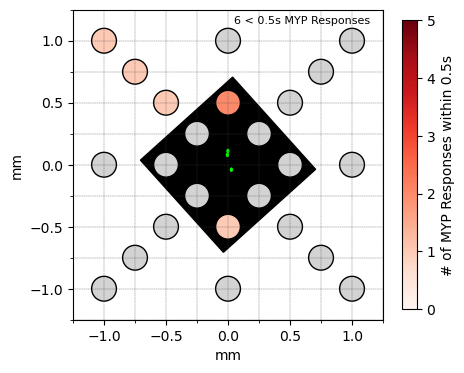

# of Responses at each location: 
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
cells
[1, 4, 5, 5, 5, 5]


In [18]:
from statistics import mean 
allLatencies = []
allInstFreq = []
allAvgFreq = []
allPostBin = []
allPostAF = []
PlexusList = []
allData = []
allROIs = []
cellNum = 0
cellslist = []

for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "MYP":
            cellBin = item['25s Mech Stim Window Binary'][1:-1]
            cellLat = item['Step 1 Latency to Spike in Stim Window'][1:-1]
            data3 = item['Max Inst Freq 25s Mech Stim Window'][1:-1]
            data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]
            data5 = item['20s Post Stim Window Binary'][1:-1]
            data6 = item['Avg Freq 20s Post Stim Window'][1:-1]
            data7 = item['ROI Coords'][1:-1]

            split_char1 = ","

            cellBinList = []
            cellLatList = []
            InstFreq = []
            AvgFreq = []
            PostBin = []
            AvgFPost = []
            cellBody = []

            nextValue = cellBin.split(split_char1)
            nextValue2 = cellLat.split(split_char1)
            nextValue3 = data3.split(split_char1)
            nextValue4 = data4.split(split_char1)
            nextValue5 = data5.split(split_char1)
            nextValue6 = data6.split(split_char1)
            nextValue7 = data7.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                cellBinList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellLatList.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                InstFreq.append(float(nextValue3[i]))
            for i in range(len(nextValue4)):
                AvgFreq.append(float(nextValue4[i]))
            for i in range(len(nextValue5)):
                PostBin.append(float(nextValue5[i]))
            for i in range(len(nextValue6)):
                AvgFPost.append(float(nextValue6[i]))

            cellData = []
            cellNum += 1
            for y in range(24):
                if cellBinList[y] == 1 and cellLatList[y] <=0.5:
                    allLatencies.append(cellLatList[y])
                    allInstFreq.append(InstFreq[y])
                    allAvgFreq.append(AvgFreq[y])
                    allPostBin.append(PostBin[y])
                    PlexusList.append(item['Plexus'])
                    cellData.append(1)
                    cellslist.append(cellNum)
                    if cellBody == []:
                        for i in range(len(nextValue7)):
                                cellBody.append(float(nextValue7[i]))

                    if PostBin[y] == 1.0:
                        allPostAF.append(AvgFPost[y])

                else:
                    cellData.append(0)
            allData.append(cellData)
            if cellBody != []:
                allROIs.append(cellBody)
     
print("Here are all of the latencies:")
print(allLatencies)
print("Here are all of the Inst Freq:")
print(allInstFreq)
print("Here are all of the Avg Freq:")
print(allAvgFreq)
print("Here are all of the Post Bin:")
print(allPostBin)
print("Here are the avg freq of the ones with post stim responses:")
print(allPostAF)
print("Here is the plexus for these cells:")
print(PlexusList)
print(len(PlexusList))

# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds'](popData[i]/5))
        ax.add_artist(c)   
        
for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax= 5), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='# of MYP Responses within 0.5s', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.6, 1.2, str(len(allLatencies)) + ' < 0.5s MYP Responses', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: ")
print(popData)
print("cells")
print(cellslist)

# For cells w/ latency < 0.5s -- SMP Cells

In [ ]:
from statistics import mean 
allLatencies = []
allInstFreq = []
allAvgFreq = []
allPostBin = []
allPostAF = []
PlexusList = []
allData = []
allROIs = []
cellNum = 0
cellslist = []


for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "SMP":
            cellBin = item['25s Mech Stim Window Binary'][1:-1]
            cellLat = item['Step 1 Latency to Spike in Stim Window'][1:-1]
            data3 = item['Max Inst Freq 25s Mech Stim Window'][1:-1]
            data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]
            data5 = item['20s Post Stim Window Binary'][1:-1]
            data6 = item['Avg Freq 20s Post Stim Window'][1:-1]
            data7 = item['ROI Coords'][1:-1]

            split_char1 = ","

            cellBinList = []
            cellLatList = []
            InstFreq = []
            AvgFreq = []
            PostBin = []
            AvgFPost = []
            cellBody = []

            nextValue = cellBin.split(split_char1)
            nextValue2 = cellLat.split(split_char1)
            nextValue3 = data3.split(split_char1)
            nextValue4 = data4.split(split_char1)
            nextValue5 = data5.split(split_char1)
            nextValue6 = data6.split(split_char1)
            nextValue7 = data7.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                cellBinList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellLatList.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                InstFreq.append(float(nextValue3[i]))
            for i in range(len(nextValue4)):
                AvgFreq.append(float(nextValue4[i]))
            for i in range(len(nextValue5)):
                PostBin.append(float(nextValue5[i]))
            for i in range(len(nextValue6)):
                AvgFPost.append(float(nextValue6[i]))

            cellData = []
            cellNum += 1
            for y in range(24):
                if cellBinList[y] == 1 and cellLatList[y] <=0.5:
                    allLatencies.append(cellLatList[y])
                    allInstFreq.append(InstFreq[y])
                    allAvgFreq.append(AvgFreq[y])
                    allPostBin.append(PostBin[y])
                    PlexusList.append(item['Plexus'])
                    cellData.append(1)
                    cellslist.append(cellNum)
                    if cellBody == []:
                        for i in range(len(nextValue7)):
                                cellBody.append(float(nextValue7[i]))

                    if PostBin[y] == 1.0:
                        allPostAF.append(AvgFPost[y])

                else:
                    cellData.append(0)
            allData.append(cellData)
            if cellBody != []:
                allROIs.append(cellBody)

    
print("Here are all of the latencies:")
print(allLatencies)
print("Here are all of the Inst Freq:")
print(allInstFreq)
print("Here are all of the Avg Freq:")
print(allAvgFreq)
print("Here are all of the Post Bin:")
print(allPostBin)
print("Here are the avg freq of the ones with post stim responses:")
print(allPostAF)
print("Here is the plexus for these cells:")
print(PlexusList)
print(len(PlexusList))

# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds'](popData[i]/5))
        ax.add_artist(c)

for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=5), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='# of SMP Responses within 0.5s', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.6, 1.2, str(len(allLatencies)) + ' < 0.5s SMP Responses', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: ")
print(popData)
print("cells")
print(cellslist)

# For cells w/ latency 25s > x > 0.5s -- MYP cells

Here are all of the latencies:
[8.48, 4.88, 3.49, 4.03, 2.84, 7.86, 22.47, 5.63, 24.94, 12.43, 22.31, 4.57, 5.06]
Here are all of the Inst Freq:
[0.52, 0.0, 0.22, 0.71, 0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17]
Here are all of the Avg Freq:
[0.08, 0.04, 0.12, 0.2, 0.08, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.12]
Here are all of the Post Bin:
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
Here are the avg freq of the ones with post stim responses:
[0.05, 0.18, 0.1, 0.05]
Here is the plexus for these cells:
['MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP', 'MYP']
13


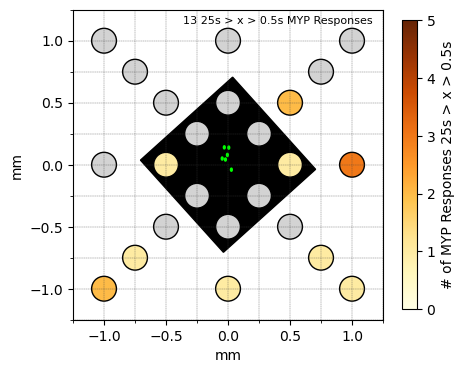

# of Responses at each location: 
[0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [19]:
from statistics import mean 
allLatencies = []
allInstFreq = []
allAvgFreq = []
allPostBin = []
allPostAF = []
PlexusList = []
allData = []
allROIs = []
        
    
for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "MYP":
            cellBin = item['25s Mech Stim Window Binary'][1:-1]
            cellLat = item['Step 1 Latency to Spike in Stim Window'][1:-1]
            data3 = item['Max Inst Freq 25s Mech Stim Window'][1:-1]
            data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]
            data5 = item['20s Post Stim Window Binary'][1:-1]
            data6 = item['Avg Freq 20s Post Stim Window'][1:-1]
            data7 = item['ROI Coords'][1:-1]

            split_char1 = ","

            cellBinList = []
            cellLatList = []
            InstFreq = []
            AvgFreq = []
            PostBin = []
            AvgFPost = []
            cellBody = []

            nextValue = cellBin.split(split_char1)
            nextValue2 = cellLat.split(split_char1)
            nextValue3 = data3.split(split_char1)
            nextValue4 = data4.split(split_char1)
            nextValue5 = data5.split(split_char1)
            nextValue6 = data6.split(split_char1)
            nextValue7 = data7.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                cellBinList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellLatList.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                InstFreq.append(float(nextValue3[i]))
            for i in range(len(nextValue4)):
                AvgFreq.append(float(nextValue4[i]))
            for i in range(len(nextValue5)):
                PostBin.append(float(nextValue5[i]))
            for i in range(len(nextValue6)):
                AvgFPost.append(float(nextValue6[i]))

            cellData = []

            for y in range(24):
                if cellBinList[y] == 1 and cellLatList[y] >0.5:
                    allLatencies.append(cellLatList[y])
                    allInstFreq.append(InstFreq[y])
                    allAvgFreq.append(AvgFreq[y])
                    allPostBin.append(PostBin[y])
                    PlexusList.append(item['Plexus'])
                    cellData.append(1)
                    if cellBody == []:
                        for i in range(len(nextValue7)):
                                cellBody.append(float(nextValue7[i]))

                    if PostBin[y] == 1.0:
                        allPostAF.append(AvgFPost[y])

                else:
                    cellData.append(0)
            allData.append(cellData)
            if cellBody != []:
                allROIs.append(cellBody)
        
     
print("Here are all of the latencies:")
print(allLatencies)
print("Here are all of the Inst Freq:")
print(allInstFreq)
print("Here are all of the Avg Freq:")
print(allAvgFreq)
print("Here are all of the Post Bin:")
print(allPostBin)
print("Here are the avg freq of the ones with post stim responses:")
print(allPostAF)
print("Here is the plexus for these cells:")
print(PlexusList)
print(len(PlexusList))

# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['YlOrBr'](popData[i]/5))
        ax.add_artist(c)

for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=5), cmap= 'YlOrBr'), ax = ax, \
             shrink = 0.75).set_label(label='# of MYP Responses 25s > x > 0.5s', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.4, 1.2, str(len(allLatencies)) + ' 25s > x > 0.5s MYP Responses', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: ")
print(popData)

# For cells w/ latency 25s > x > 0.5s -- SMP cells

In [ ]:
from statistics import mean 
allLatencies = []
allInstFreq = []
allAvgFreq = []
allPostBin = []
allPostAF = []
PlexusList = []
allData = []
allROIs = []


        
for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "SMP":
            cellBin = item['25s Mech Stim Window Binary'][1:-1]
            cellLat = item['Step 1 Latency to Spike in Stim Window'][1:-1]
            data3 = item['Max Inst Freq 25s Mech Stim Window'][1:-1]
            data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]
            data5 = item['20s Post Stim Window Binary'][1:-1]
            data6 = item['Avg Freq 20s Post Stim Window'][1:-1]
            data7 = item['ROI Coords'][1:-1]

            split_char1 = ","

            cellBinList = []
            cellLatList = []
            InstFreq = []
            AvgFreq = []
            PostBin = []
            AvgFPost = []
            cellBody = []

            nextValue = cellBin.split(split_char1)
            nextValue2 = cellLat.split(split_char1)
            nextValue3 = data3.split(split_char1)
            nextValue4 = data4.split(split_char1)
            nextValue5 = data5.split(split_char1)
            nextValue6 = data6.split(split_char1)
            nextValue7 = data7.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                cellBinList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellLatList.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                InstFreq.append(float(nextValue3[i]))
            for i in range(len(nextValue4)):
                AvgFreq.append(float(nextValue4[i]))
            for i in range(len(nextValue5)):
                PostBin.append(float(nextValue5[i]))
            for i in range(len(nextValue6)):
                AvgFPost.append(float(nextValue6[i]))


            cellData = []

            for y in range(24):
                if cellBinList[y] == 1 and cellLatList[y] >0.5:
                    allLatencies.append(cellLatList[y])
                    allInstFreq.append(InstFreq[y])
                    allAvgFreq.append(AvgFreq[y])
                    allPostBin.append(PostBin[y])
                    PlexusList.append(item['Plexus'])
                    cellData.append(1)
                    if cellBody == []:
                        for i in range(len(nextValue7)):
                                cellBody.append(float(nextValue7[i]))

                    if PostBin[y] == 1.0:
                        allPostAF.append(AvgFPost[y])

                else:
                    cellData.append(0)
            allData.append(cellData)
            if cellBody != []:
                allROIs.append(cellBody)
        
     
print("Here are all of the latencies:")
print(allLatencies)
print("Here are all of the Inst Freq:")
print(allInstFreq)
print("Here are all of the Avg Freq:")
print(allAvgFreq)
print("Here are all of the Post Bin:")
print(allPostBin)
print("Here are the avg freq of the ones with post stim responses:")
print(allPostAF)
print("Here is the plexus for these cells:")
print(PlexusList)
print(len(PlexusList))

# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['YlOrBr'](popData[i]/5))
        ax.add_artist(c)

for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=5), cmap= 'YlOrBr'), ax = ax, \
             shrink = 0.75).set_label(label='# of SMP Responses 25s > x > 0.5s', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.4, 1.2, str(len(allLatencies)) + ' 25s > x > 0.5s SMP Responses', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: ")
print(popData)

# For cells w/ latency > 25s -- MYP cells

Here are all of the latencies:
[28.31, 27.42, 37.69]
Here are all of the Inst Freq:
[0.0, 0.0, 0.0]
Here are all of the Avg Freq:
[0.05, 0.05, 0.05]
Here are all of the Post Bin:
[1.0, 1.0, 1.0]
Here are the avg freq of the ones with post stim responses:
[0.05, 0.18, 0.1, 0.05]
Here is the plexus for these cells:
['MYP', 'MYP', 'MYP']
3


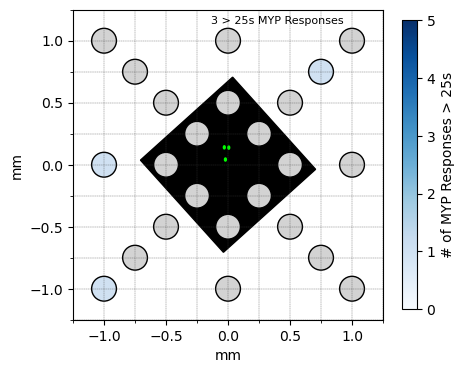

# of Responses at each location: 
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
from statistics import mean 
allLatencies = []
allInstFreq = []
allAvgFreq = []
allPostBin = []
allMechBin = []
PlexusList = []
allData = []
allROIs = []
        

    
for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "MYP":
            cellBin = item['25s Mech Stim Window Binary'][1:-1]
            cellLat = item['Step 1 Latency to Spike in Post Stim Window'][1:-1]
            data3 = item['Max Inst Freq Post Stim Window'][1:-1]
            data4 = item['Avg Freq 20s Post Stim Window'][1:-1]
            data5 = item['20s Post Stim Window Binary'][1:-1]
            data7 = item['ROI Coords'][1:-1]

            split_char1 = ","

            cellBinList = []
            cellLatList = []
            InstFreq = []
            AvgFreq = []
            PostBin = []
            cellBody = []


            nextValue = cellBin.split(split_char1)
            nextValue2 = cellLat.split(split_char1)
            nextValue3 = data3.split(split_char1)
            nextValue4 = data4.split(split_char1)
            nextValue5 = data5.split(split_char1)
            nextValue7 = data7.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                cellBinList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellLatList.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                InstFreq.append(float(nextValue3[i]))
            for i in range(len(nextValue4)):
                AvgFreq.append(float(nextValue4[i]))
            for i in range(len(nextValue5)):
                PostBin.append(float(nextValue5[i]))

            cellData = []

            for y in range(24):
                if cellBinList[y] == 0 and PostBin[y] == 1.0:
                    allMechBin.append(cellBinList[y])
                    allLatencies.append(cellLatList[y])
                    allInstFreq.append(InstFreq[y])
                    allAvgFreq.append(AvgFreq[y])
                    allPostBin.append(PostBin[y])
                    PlexusList.append(item['Plexus'])
                    cellData.append(1)
                    if cellBody == []:
                        for i in range(len(nextValue7)):
                                cellBody.append(float(nextValue7[i]))

                else:
                    cellData.append(0)
            allData.append(cellData)
            if cellBody != []:
                allROIs.append(cellBody)
        
     
print("Here are all of the latencies:")
print(allLatencies)
print("Here are all of the Inst Freq:")
print(allInstFreq)
print("Here are all of the Avg Freq:")
print(allAvgFreq)
print("Here are all of the Post Bin:")
print(allPostBin)
print("Here are the avg freq of the ones with post stim responses:")
print(allPostAF)
print("Here is the plexus for these cells:")
print(PlexusList)
print(len(PlexusList))

# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Blues'](popData[i]/5))
        ax.add_artist(c)

for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=5), cmap= 'Blues'), ax = ax, \
             shrink = 0.75).set_label(label='# of MYP Responses > 25s', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.4, 1.2, str(len(allLatencies)) + ' > 25s MYP Responses', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: ")
print(popData)

# For cells w/ latency > 25s -- SMP cells

In [ ]:
from statistics import mean 
allLatencies = []
allInstFreq = []
allAvgFreq = []
allPostBin = []
allMechBin = []
PlexusList = []
allData = []
allROIs = []


for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        if item['Plexus'] == "SMP":
            cellBin = item['25s Mech Stim Window Binary'][1:-1]
            cellLat = item['Step 1 Latency to Spike in Post Stim Window'][1:-1]
            data3 = item['Max Inst Freq Post Stim Window'][1:-1]
            data4 = item['Avg Freq 20s Post Stim Window'][1:-1]
            data5 = item['20s Post Stim Window Binary'][1:-1]
            data7 = item['ROI Coords'][1:-1]

            split_char1 = ","

            cellBinList = []
            cellLatList = []
            InstFreq = []
            AvgFreq = []
            PostBin = []
            cellBody = []


            nextValue = cellBin.split(split_char1)
            nextValue2 = cellLat.split(split_char1)
            nextValue3 = data3.split(split_char1)
            nextValue4 = data4.split(split_char1)
            nextValue5 = data5.split(split_char1)
            nextValue7 = data7.split(split_char1)

            #The loop that cleans each file and adds intensity for each line into intensityList
            for i in range(len(nextValue)):
                cellBinList.append(float(nextValue[i]))
            for i in range(len(nextValue2)):
                cellLatList.append(float(nextValue2[i]))
            for i in range(len(nextValue3)):
                InstFreq.append(float(nextValue3[i]))
            for i in range(len(nextValue4)):
                AvgFreq.append(float(nextValue4[i]))
            for i in range(len(nextValue5)):
                PostBin.append(float(nextValue5[i]))

            cellData = []

            for y in range(24):
                if cellBinList[y] == 0 and PostBin[y] == 1.0:
                    allMechBin.append(cellBinList[y])
                    allLatencies.append(cellLatList[y])
                    allInstFreq.append(InstFreq[y])
                    allAvgFreq.append(AvgFreq[y])
                    allPostBin.append(PostBin[y])
                    PlexusList.append(item['Plexus'])
                    cellData.append(1)
                    if cellBody == []:
                        for i in range(len(nextValue7)):
                                cellBody.append(float(nextValue7[i]))

                else:
                    cellData.append(0)
            allData.append(cellData)
            if cellBody != []:
                allROIs.append(cellBody)
        
     
print("Here are all of the latencies:")
print(allLatencies)
print("Here are all of the Inst Freq:")
print(allInstFreq)
print("Here are all of the Avg Freq:")
print(allAvgFreq)
print("Here are all of the Post Bin:")
print(allPostBin)
print("Here are the avg freq of the ones with post stim responses:")
print(allPostAF)
print("Here is the plexus for these cells:")
print(PlexusList)
print(len(PlexusList))

# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)

for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Blues'](popData[i]/5))
        ax.add_artist(c)

for k in range(len(allROIs)):
# Display Cell
    cell = Ellipse((allROIs[k][0],allROIs[k][1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
    ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=5), cmap= 'Blues'), ax = ax, \
             shrink = 0.75).set_label(label='# of SMP Responses > 25s', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.4, 1.2, str(len(allLatencies)) + ' > 25s SMP Responses', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)


plt.show()

print("# of Responses at each location: ")
print(popData)

# Sorting Responses in Spontaneous Cells

## All Spontaneous Cells
## And # of Spots per Spontaneous Cell (broken down by MYP and SMP)

In [ ]:
allData = []
numSpots = []
numSpotsMYP = []
numSpotsSMP = [] 
spontaneousSpots = []
latMaxInst = []
allAvgFreq = []
latMaxInstMYP = []
latMaxInstSMP = []
Totalspikes = 0
spontaneousSpikesPerEpoch = []


            
for item in cellDataList:
    
    spotCounter = 0
    spontaneityCounter = 0
    epochCounts = 0
    
    if item['Responder?'] == "Spontaneous Cell":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]
        data3 = item['Avg Freq Pre Stim'][1:-1]
        data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]
        data5 = item['Max Inst Freq 25s Mech Stim Window'][1:-1]
        data6 = item['Latency to Max Inst Freq Stim Window'][1:-1]
        data7 = item['Max Inst Freq Post Stim Window'][1:-1]
        data8 = item['Latency to Max Inst Freq Post Stim Window'][1:-1]
        cellAvg = item['Avg Freq Full 45s'][1:-1]
        approvedSpikes = item['All Approved Cell Spike Times'][1:-1]

        split_char1 = ","

        bin_List = []
        cellBody = []
        avgFbase = []
        avgFstim = []
        dataList = []
        maxIn25 = []
        LatMax25 = []
        maxIn45 = []
        LatMax45 = []
        cellAvgList = []
        spikeList = []

        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        nextValue3 = data3.split(split_char1)
        nextValue4 = data4.split(split_char1)
        nextValue5 = data5.split(split_char1)
        nextValue6 = data6.split(split_char1)
        nextValue7 = data7.split(split_char1)
        nextValue8 = data8.split(split_char1)
        nextValue9 = cellAvg.split(split_char1)
        nextValue10 = approvedSpikes.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            bin_List.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            avgFbase.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            avgFstim.append(float(nextValue4[i]))
        for i in range(len(nextValue5)):
            maxIn25.append(float(nextValue5[i]))
        for i in range(len(nextValue6)):
            LatMax25.append(float(nextValue6[i]))
        for i in range(len(nextValue7)):
            maxIn45.append(float(nextValue7[i]))
        for i in range(len(nextValue8)):
            LatMax45.append(float(nextValue8[i]))
        for i in range(len(nextValue9)):
            cellAvgList.append(float(nextValue9[i]))
        for i in range(len(nextValue10)):
            spikeList.append(float(nextValue10[i]))

        for i in range(24):
            if bin_List[i] == 1:
                allAvgFreq.append(cellAvgList[i])
                if avgFstim[i] - avgFbase[i] > .1:
                    dataList.append(1)
                    spotCounter = spotCounter + 1
                    
                    if maxIn25[i] > maxIn45[i]:
                        latMaxInst.append(LatMax25[i])
                        
                        if item['Plexus'] == "MYP":
                            latMaxInstMYP.append(LatMax25[i])
                        if item['Plexus'] == "SMP":
                            latMaxInstSMP.append(LatMax25[i]) 
                    
                    elif maxIn25[i] < maxIn45[i]:
                        latMaxInst.append(round(LatMax45[i]+25, 2))
                        
                        if item['Plexus'] == "MYP":
                            latMaxInstMYP.append(round(LatMax45[i]+25, 2))
                        if item['Plexus'] == "SMP":
                            latMaxInstSMP.append(round(LatMax45[i]+25, 2)) 
                            
                    elif maxIn25[i] == maxIn45[i] and maxIn25[i] != 0:
                        latMaxInst.append(LatMax25[i])
                        
                        if item['Plexus'] == "MYP":
                            latMaxInstMYP.append(LatMax25[i])
                        if item['Plexus'] == "SMP":
                            latMaxInstSMP.append(LatMax25[i]) 
                            
                else:
                    dataList.append(0)
            else:
                dataList.append(0)
            
        allData.append(dataList)

        numSpots.append(spotCounter)
        if item['Plexus'] == "MYP":
            numSpotsMYP.append(spotCounter)
        if item['Plexus'] == "SMP":
            numSpotsSMP.append(spotCounter)    
            
        for i in range(24):
            
            spontaneityCounter = 0
            if i == 11:
                epochEndTime = 568
            else:
                epochEndTime = vLineList[4+(i*4)]
            if i == 0:
                epochStartTime = 0
            if i == 12:
                epochStartTime = 568.65
            else:
                epochStartTime = vLineList[(i*4)-1] 
            for item in spikeList:
                if item >= epochStartTime and item < epochEndTime:
                    spontaneityCounter += 1
            if spontaneityCounter > 0:
                spontaneousSpikesPerEpoch.append(spontaneityCounter)
                epochCounts += 1
        spontaneousSpots.append(epochCounts)
                
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)


for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds']((2*popData[i]/len(allData))))
        ax.add_artist(c)

# Display Cell
#cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
#ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=50), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='% of Neurons Responding to Mechanical Stimuli', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.65, 1.2, str(len(allData)) + ' Spontaneous Cells', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

print("All Spontaneous Cells")
plt.show()
'''
print("Here are all of the # of spikes/spot:")
spikesPerSpot = []
for f in allAvgFreq:
    epochSpikes = 0
    if f != 0.0:
        spikesPerSpot.append(round(f * 45))
        Totalspikes += 1
        epochSpikes += 1
print(spikesPerSpot)
'''
print("Mech count of spikes per spot: ", spontaneousSpikesPerEpoch) 
print("Number of Spotaneous Epochs per Cell: ", spontaneousSpots)
print("# of Responses at each location: " + str(popData))
print("# of Responding Spots per Spontaneous cells: ", numSpots)
print("# of Spots per MYP Spontaneous cells: ", numSpotsMYP)
print("# of Spots per SMP Spontaneous cells: ", numSpotsSMP)

print("Latency to Max Inst Freq of Spontaneous Responders: ", latMaxInst)
print("Latency to Max Inst Freq of MYP Spontaneous Responders: ", latMaxInstMYP)
print("Latency to Max Inst Freq of SMP Spontaneous Responders: ", latMaxInstSMP)
print(len(latMaxInst))
print(len(latMaxInstMYP))
print(len(latMaxInstSMP))

#Creates intensity vs time plot, setting size of plot
allLats = plt.figure()
allLats.set_figheight(8)
counts = plt.hist(latMaxInst, bins = 45)

plt.xlabel('Latency to Max Inst Freq (s)', fontdict = {'fontsize' : 12})

plt.show()

## ONLY MYP Spontaneous Cells

In [ ]:
allData = []

for item in cellDataList:
    if item['Responder?'] == "Spontaneous Cell" and item['Plexus'] == "MYP":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]
        data3 = item['Avg Freq Pre Stim'][1:-1]
        data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]

        split_char1 = ","

        bin_List = []
        cellBody = []
        avgFbase = []
        avgFstim = []
        dataList = []

        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        nextValue3 = data3.split(split_char1)
        nextValue4 = data4.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            bin_List.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            avgFbase.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            avgFstim.append(float(nextValue4[i]))

            
        for i in range(24):
            if bin_List[i] == 1:
                if avgFstim[i] > avgFbase[i]:
                    dataList.append(1)
                else:
                    dataList.append(0)
            else:
                dataList.append(0)
            
        allData.append(dataList)
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)


for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds']((2*popData[i]/len(allData))))
        ax.add_artist(c)

# Display Cell
#cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
#ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=50), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='% of Neurons Responding to Mechanical Stimuli', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.65, 1.2, str(len(allData)) + ' Spontaneous Cells', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

print("MYP Spontaneous Cells")
plt.show()

print("# of Responses at each location: " + str(popData))

## ONLY SMP Spontaneous Cells

In [ ]:
allData = []

for item in cellDataList:
    if item['Responder?'] == "Spontaneous Cell" and item['Plexus'] == "SMP":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]
        data3 = item['Avg Freq Pre Stim'][1:-1]
        data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]

        split_char1 = ","

        bin_List = []
        cellBody = []
        avgFbase = []
        avgFstim = []
        dataList = []

        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        nextValue3 = data3.split(split_char1)
        nextValue4 = data4.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            bin_List.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            avgFbase.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            avgFstim.append(float(nextValue4[i]))

            
        for i in range(24):
            if bin_List[i] == 1:
                if avgFstim[i] > avgFbase[i]:
                    dataList.append(1)
                else:
                    dataList.append(0)
            else:
                dataList.append(0)
            
        allData.append(dataList)
        
# Making List of # of Responses        
popData = []
for g in range(24):
    sum = 0
    for f in range(len(allData)):
        sum = sum + allData[f][g]
    popData.append(sum)
        
# Population Plot

xgrid = np.arange(-1, 1, 0.25)
ygrid = np.arange(-1, 1, 0.25)
    
fig, ax = plt.subplots(figsize=(5,5))

ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
ax.add_artist(r)


for i in range(len(stimLocations)):
    if popData[i] == 0:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
        ax.add_artist(c)
    else:
        c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor= plt.colormaps['Reds']((popData[i]/len(allData))))
        ax.add_artist(c)

# Display Cell
#cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
#ax.add_artist(cell)

fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=100), cmap= 'Reds'), ax = ax, \
             shrink = 0.75).set_label(label='% of Neurons Responding to Mechanical Stimuli', size=10)

ax.set_xlabel('mm', fontsize = 10)    
ax.set_ylabel('mm', fontsize = 10)
#ax.set_title('Mechanical Response Grid')

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

ax.tick_params(labelsize = 10)

ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])

ax.set_aspect(1.0)

#ax.text(-1, 1.2, "", ha='center', va='top', color='black', size = 8)

ax.text(0.65, 1.2, str(len(allData)) + ' Spontaneous Cells', ha='center', va='top', color='black', size = 8)


#ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)

print("SMP Spontaneous Cells")
plt.show()

print("# of Responses at each location: " + str(popData))

# Response Grids for Spontaneous Cells

In [ ]:
cellNum = 0


for item in cellDataList:
    cellNum = cellNum + 1
    
    if item['Responder?'] == "Spontaneous Cell":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]
        data3 = item['Avg Freq Pre Stim'][1:-1]
        data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]

        split_char1 = ","

        bin_List = []
        cellBody = []
        avgFbase = []
        avgFstim = []
        
        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        nextValue3 = data3.split(split_char1)
        nextValue4 = data4.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            bin_List.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            avgFbase.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            avgFstim.append(float(nextValue4[i]))

        xgrid = np.arange(-1, 1, 0.25)
        ygrid = np.arange(-1, 1, 0.25)


        fig, ax = plt.subplots(figsize=(7,7))

        ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

        r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 45, rotation_point='center')
        ax.add_artist(r)
        
        for i in range(24):
            if bin_List[i] == 1:
                if avgFstim[i] > avgFbase[i]:
                    c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='red')
                    ax.add_artist(c)
                else:
                    c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                    ax.add_artist(c)
            else:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                ax.add_artist(c)

        # Display Cell
        cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
        ax.add_artist(cell)

        #ax.set_xlabel('mm', fontsize = 10)    
        #ax.set_ylabel('mm', fontsize = 10)
        #ax.set_title('Mechanical Response Grid')

        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))

        ax.tick_params(labelsize = 10)

        ax.set_xlim([-1.25, 1.25])
        ax.set_ylim([-1.25, 1.25])

        ax.set_aspect(1.0)

        ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 11)
        ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 11)

        if item['Responder?'] == "Spontaneous Cell":
            ax.text(0.9, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 11)
        elif item['Responder?'] == "Yes":
            ax.text(0.9, 1.2, 'Responder', ha='center', va='top', color='black', size = 11)
        else:
            ax.text(0.9, 1.2, 'Non-Responder', ha='center', va='top', color='black', size = 11)

        #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)
        
        ax.text(-1.05, -1.4, "\u2190 oral", ha='center', va='top', color='black', size = 11)
        ax.text(1, -1.4, "aboral \u2192", ha='center', va='top', color='black', size = 11)
        ax.text(0, -1.4, "mm", ha='center', va='top', color='black', size = 11)
        ax.text(-1.55, 0.38, "\u2190  circumferential  \u2192", ha='center', va='top', color='black', size = 11, rotation = 'vertical')
        ax.text(-1.47, 0.08, "mm", ha='center', va='top', color='black', size = 11, rotation = 'vertical')

        plt.show()

# Calculating Avg Freq of Baseline vs Response for Spon Cells

In [ ]:
from statistics import mean 
allBaseAvg = []
allStimAvg = []

for item in cellDataList:
    if item['Responder?'] == "Spontaneous Cell":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]
        data3 = item['Avg Freq Pre Stim'][1:-1]
        data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]

        split_char1 = ","

        bin_List = []
        cellBody = []
        avgFbase = []
        avgFstim = []
        baseList = []
        stimList = []

        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        nextValue3 = data3.split(split_char1)
        nextValue4 = data4.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            bin_List.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            avgFbase.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            avgFstim.append(float(nextValue4[i]))

            
        for i in range(24):
            if bin_List[i] == 1:
                if avgFstim[i] > avgFbase[i]:
                    baseList.append(avgFbase[i])
                    stimList.append(avgFstim[i])
        
        if baseList != []:
            allBaseAvg.append(mean(baseList))
            allStimAvg.append(mean(stimList))

print("Baseline Avg List:")
print(allBaseAvg)
print("Stim Avg List:")
print(allStimAvg)

# Calculating Avg Freq of Baseline vs Response for Responding Cells

In [ ]:
from statistics import mean 
allBaseAvg = []
allStimAvg = []

for item in cellDataList:
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        data = item['25s Mech Stim Window Binary'][1:-1]
        data2 = item['ROI Coords'][1:-1]
        data3 = item['Avg Freq Pre Stim'][1:-1]
        data4 = item['Avg Freq 25s Mech Stim Window'][1:-1]

        split_char1 = ","

        bin_List = []
        cellBody = []
        avgFbase = []
        avgFstim = []
        baseList = []
        stimList = []

        nextValue = data.split(split_char1)
        nextValue2 = data2.split(split_char1)
        nextValue3 = data3.split(split_char1)
        nextValue4 = data4.split(split_char1)
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            bin_List.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            cellBody.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            avgFbase.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            avgFstim.append(float(nextValue4[i]))

            
        for i in range(24):
            if bin_List[i] == 1: 
                baseList.append(avgFbase[i])
                stimList.append(avgFstim[i])
        
        if baseList != []:
            allBaseAvg.append(mean(baseList))
            allStimAvg.append(mean(stimList))

print("Baseline Avg List:")
print(allBaseAvg)
print("Stim Avg List:")
print(allStimAvg)
print(mean(allStimAvg))

# Making Responder plots w/ spots color coded by latency of response. At Bottom is list of # of Responding Spots (categorized by MYP vs SMP)

In [ ]:
cellNum = 0
respNum = 0
num25Spots = []
num45Spots = []
num25SpotsMYP = []
num45SpotsMYP = []
num25SpotsSMP = []
num45SpotsSMP = []


for item in cellDataList:
    
    cellNum = cellNum + 1
    
    spotCounter25 = 0
    spotCounter45 = 0
    spotCounter25MYP = 0
    spotCounter45MYP = 0
    spotCounter25SMP = 0
    spotCounter45SMP = 0
    
    if item['Responder?'] == "Mech Responder only" or item['Responder?'] =="Mech and EFS Responder":
        stimBin = item['25s Mech Stim Window Binary'][1:-1]
        postBin = item['20s Post Stim Window Binary'][1:-1]
        stimLat = item['Step 1 Latency to Spike in Stim Window'][1:-1]
        postLat = item['Step 1 Latency to Spike in Post Stim Window'][1:-1]
        roi = item['ROI Coords'][1:-1]
        
        split_char1 = ","

        stimBinList = []
        postBinList = []
        stimLatList = []
        postLatList = []
        cellBody = []

        nextValue = stimBin.split(split_char1)
        nextValue2 = postBin.split(split_char1)
        nextValue3 = stimLat.split(split_char1)
        nextValue4 = postLat.split(split_char1)
        nextValue5 = roi.split(split_char1)
        
        #The loop that cleans each file and adds intensity for each line into intensityList
        for i in range(len(nextValue)):
            stimBinList.append(float(nextValue[i]))
        for i in range(len(nextValue2)):
            postBinList.append(float(nextValue2[i]))
        for i in range(len(nextValue3)):
            stimLatList.append(float(nextValue3[i]))
        for i in range(len(nextValue4)):
            postLatList.append(float(nextValue4[i]))
        for i in range(len(nextValue5)):
            cellBody.append(float(nextValue5[i]))

            
        xgrid = np.arange(-1, 1, 0.25)
        ygrid = np.arange(-1, 1, 0.25)


        fig, ax = plt.subplots(figsize=(7,7))

        ax.grid(linestyle="--", linewidth=0.25, color='.25', which='both')

        r = Rectangle((-0.5,-0.5), 1, 1, edgecolor='black', facecolor='black', angle = 42, rotation_point='center')
        ax.add_artist(r)
        

        for i in range(24):
            if stimBinList[i] == 0 and postBinList[i] == 0:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='lightgray')
                ax.add_artist(c)
            elif stimBinList[i] == 1 and stimLatList[i] < 0.5:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='red')
                ax.add_artist(c)
                spotCounter25 = spotCounter25 + 1
                spotCounter45 = spotCounter45 + 1
                if item['Plexus'] == "MYP":
                    spotCounter25MYP = spotCounter25MYP + 1
                    spotCounter45MYP = spotCounter45MYP + 1
                elif item['Plexus'] == "SMP":
                    spotCounter25SMP = spotCounter25SMP + 1
                    spotCounter45SMP = spotCounter45SMP + 1
                    
            elif stimBinList[i] == 1 and stimLatList[i] > 0.5:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='yellow')
                ax.add_artist(c)
                spotCounter25 = spotCounter25 + 1
                spotCounter45 = spotCounter45 + 1
                if item['Plexus'] == "MYP":
                    spotCounter25MYP = spotCounter25MYP + 1
                    spotCounter45MYP = spotCounter45MYP + 1
                elif item['Plexus'] == "SMP":
                    spotCounter25SMP = spotCounter25SMP + 1
                    spotCounter45SMP = spotCounter45SMP + 1
                    
            elif stimBinList[i] == 0 and postBinList[i] == 1.0:
                c = Circle((stimLocations[i][0], stimLocations[i][1]), radius=0.1, edgecolor='black', facecolor='blue')
                ax.add_artist(c)
                spotCounter45 = spotCounter45 + 1
                if item['Plexus'] == "MYP":
                    spotCounter45MYP = spotCounter45MYP + 1
                elif item['Plexus'] == "SMP":
                    spotCounter45SMP = spotCounter45SMP + 1

        # Display Cell
        cell = Ellipse((cellBody[0],cellBody[1]), 0.015, 0.025, edgecolor='lime', facecolor='lime')
        ax.add_artist(cell)

        #ax.set_xlabel('mm', fontsize = 10)    
        #ax.set_ylabel('mm', fontsize = 10)
        #ax.set_title('Mechanical Response Grid')

        ax.yaxis.set_minor_locator(MultipleLocator(0.25))
        ax.xaxis.set_minor_locator(MultipleLocator(0.25))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))

        ax.tick_params(labelsize = 10)

        ax.set_xlim([-1.25, 1.25])
        ax.set_ylim([-1.25, 1.25])

        ax.set_aspect(1.0)

        ax.text(-1, 1.2,"Cell # " + str(cellNum), ha='center', va='top', color='black', size = 11)
        ax.text(-0.975, -1.15, item['GI Region'] + " " + item['Plexus'], ha='center', va='top', color='black', size = 11)

        ax.text(0.75, 1.2, item['Responder?'], ha='center', va='top', color='black', size = 11)

        #ax.text(0.8, 0.3, 'Red = Mechanical Response', ha='center', va='top', color='black', size = 10)
        ax.text(-1.05, -1.4, "\u2190 oral", ha='center', va='top', color='black', size = 11)
        ax.text(1, -1.4, "aboral \u2192", ha='center', va='top', color='black', size = 11)
        ax.text(0, -1.4, "mm", ha='center', va='top', color='black', size = 11)
        ax.text(-1.55, 0.38, "\u2190  circumferential  \u2192", ha='center', va='top', color='black', size = 11, rotation = 'vertical')
        ax.text(-1.47, 0.08, "mm", ha='center', va='top', color='black', size = 11, rotation = 'vertical')

        plt.show()
        
        respNum = respNum + 1
        num25Spots.append(spotCounter25)
        num45Spots.append(spotCounter45)
        if item['Plexus'] == "MYP":
            num25SpotsMYP.append(spotCounter25MYP)
            num45SpotsMYP.append(spotCounter45MYP)
        if item['Plexus'] == "SMP":
            num25SpotsSMP.append(spotCounter25SMP)
            num45SpotsSMP.append(spotCounter45SMP)
        
print("# of Responders: ", respNum)
print("# of Spots in 25s period: ", num25Spots)
print("# of Spots in 45s period: ", num45Spots)
print("MYP # of Spots in 25s period: ", num25SpotsMYP)
print("MYP # of Spots in 45s period: ", num45SpotsMYP)
print("SMP # of Spots in 25s period: ", num25SpotsSMP)
print("SMP # of Spots in 45s period: ", num45SpotsSMP)